In [1]:
import pandas as pd
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express  as xp
import json
import time
from scipy.sparse import csc_matrix
%matplotlib inline

In [24]:
# New_Teller['TRANSACTION_CODE'] = New_Teller['TRANSACTION_CODE'].astype(str)
# New_Teller1 = New_Teller[New_Teller['TRANSACTION_CODE'].str.contains('(10.0|125.0|131.0|163.0|165.0|166.0|167.0|168.0|19.0|23.0|24.0|28.0|32.0|33.0|35.0|36.0|39.0|4.0|40.0|5.0|7.0|84.0|9.0)')]
# New_Teller1
transaction_codes = [10.0, 125.0, 131.0, 163.0, 165.0, 166.0, 167.0, 168.0, 19.0, 23.0, 24.0, 28.0, 32.0, 33.0, 35.0, 36.0, 39.0, 4.0, 40.0, 5.0, 7.0, 84.0, 9.0]
New_Teller = New_Teller[New_Teller['TRANSACTION_CODE'].isin(transaction_codes)]
New_Teller

,RECID,TRANSACTION_CODE,TELLER_ID_1,DR_CR_MARKER,CURRENCY_1,ACCOUNT_1,AMOUNT_LOCAL_1,VALUE_DATE_1,CURR_MARKET_1,POS_TYPE_1,CURRENCY_2,TELLER_ID_2,ACCOUNT_2,CUSTOMER_2,AMOUNT_LOCAL_2,RATE_1,DEAL_RATE,AMOUNT_FCY_2,CHRG_AMT_FCCY,CHEQUE_NUMBER,CHEQ_TYPE,NET_AMOUNT,VALUE_DATE_2,EXPOSURE_DATE_2,EXPOSURE_DATE_2.1,POS_TYPE_2,NARRATIVE_2,WAIVE_CHARGES,TT_RECIEVER,AUTH_DATE,INPUTTER,DATE_TIME,AUTHORISER,CO_CODE,DEPT_CODE,SHORT_DESC,TARGET,GENDER,SEGMENT,DESCRIPTION,COMPANY_NAME
2,TT223369QC7F;1,163.0,1601.0,DEBIT,RWF,RWF1000116011017,25000.0,20221202.0,10.0,TR,RWF,1601.0,100016762592,1243798.0,25000.0,NaN,NaN,NaN,NaN,NaN,NaN,25000.0,20221202.0,20221202.0,20221202.0,TR,20222361940/BERTIN UWINEZA/SC-F,YES,NaN,20221202.0,31859_RW002270_I_INAU_OFS_IRISINTERNAL,2.212021e+09,31859_RW002270_OFS_IRISINTERNAL,RW0010017,403376.0,Bill Cash Deposit,54.0,,SME,Medium SME,NYAGATARE BRANCH
3,TT223369QC7F;2,163.0,1601.0,DEBIT,RWF,RWF1000116011017,25000.0,20221202.0,10.0,TR,RWF,1601.0,100016762592,1243798.0,25000.0,NaN,NaN,NaN,NaN,NaN,NaN,25000.0,20221202.0,20221202.0,20221202.0,TR,20222361940/BERTIN UWINEZA/SC-F,YES,NaN,20221202.0,57060_RW002270_R_RNAU_OFS_IRISINTERNAL,2.212021e+09,57060_RW002270_OFS_IRISINTERNAL,RW0010017,403376.0,Bill Cash Deposit,54.0,,SME,Medium SME,NYAGATARE BRANCH
4,TT22336L6JPR;1,10.0,4603.0,DEBIT,RWF,RWF1000146031047,300000.0,20221202.0,10.0,TR,RWF,4603.0,100034937715,1440862.0,300000.0,NaN,NaN,NaN,NaN,NaN,NaN,300000.0,20221202.0,20221202.0,20221202.0,TR,100034937715,YES,NaN,20221202.0,10895929_RW001273_I_INAU_OFS_BROWSERTC,2.212021e+09,10895929_RW001273_OFS_BROWSERTC,RW0010047,403073.0,Cash Deposit - LCY,49.0,,SME,Local NGO,INSURANCE PLAZA BRANCH
5,TT22336L6JPR;2,10.0,4603.0,DEBIT,RWF,RWF1000146031047,300000.0,20221202.0,10.0,TR,RWF,4603.0,100034937715,1440862.0,300000.0,NaN,NaN,NaN,NaN,NaN,NaN,300000.0,20221202.0,20221202.0,20221202.0,TR,100034937715,YES,NaN,20221202.0,10896452_RW000996_R_RNAU_OFS_BROWSERTC,2.212021e+09,10896452_RW000996_OFS_BROWSERTC,RW0010047,403277.0,Cash Deposit - LCY,49.0,,SME,Local NGO,INSURANCE PLAZA BRANCH
8,TT22336BKHG4;1,165.0,1102.0,DEBIT,RWF,RWF1000111021012,451000.0,20221202.0,10.0,TR,RWF,1102.0,RWF1703200051002,NaN,451000.0,NaN,NaN,NaN,NaN,NaN,NaN,451000.0,20221202.0,NaN,NaN,TR,446999X1541/0788566046/MAJUNE SIBO,YES,NaN,20221202.0,4560_RW001123_I_INAU_OFS_IRISINTERNAL,2.212021e+09,4560_RW001123_OFS_IRISINTERNAL,RW0010012,403044.0,RB RWF,NaN,NaN,NaN,NaN,RUBAVU BRANCH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402470,TT230933D4XL;2,10.0,609.0,DEBIT,RWF,RWF1000106091007,30000.0,20230403.0,10.0,TR,RWF,609.0,100074439068,1276552.0,30000.0,NaN,NaN,NaN,NaN,NaN,NaN,30000.0,20230403.0,20230403.0,20230403.0,TR,MUKAMA JEAN CHRISOSTOME/MOTO,YES,NaN,20230403.0,13060102_RW001603_R_RNAU_OFS_BROWSERTC,2.304011e+09,13060102_RW001603_OFS_BROWSERTC,RW0010007,403164.0,Cash Deposit - LCY,53.0,,SME,Large SME,NYABUGOGO BRANCH
1402475,TT230937GKRV;1,10.0,805.0,DEBIT,RWF,RWF1000108051009,180000.0,20230403.0,10.0,TR,RWF,805.0,100012520845,1188997.0,180000.0,NaN,NaN,NaN,NaN,NaN,NaN,180000.0,20230403.0,20230403.0,20230403.0,TR,hodali emmanuel,YES,NaN,20230403.0,12941702_RW002132_I_INAU_OFS_BROWSERTC,2.304011e+09,12941702_RW002132_OFS_BROWSERTC,RW0010009,403320.0,Cash Deposit - LCY,54.0,,SME,Medium SME,KIMIRONKO BRANCH
1402476,TT230937GKRV;2,10.0,805.0,DEBIT,RWF,RWF1000108051009,180000.0,20230403.0,10.0,TR,RWF,805.0,100012520845,1188997.0,180000.0,NaN,NaN,NaN,NaN,NaN,NaN,180000.0,20230403.0,20230403.0,20230403.0,TR,hodali emmanuel,YES,NaN,20230403.0,13103295_RW001439_R_RNAU_OFS_BROWSERTC,2.304012e+09,13103295_RW001439_OFS_BROWSERTC,RW0010009,403109.0,Cash Deposit - LCY,54.0,,SME,Medium SME,KIMIRONKO BRANCH
1402477,TT23093HZBJV;1,10.0,4207.0,DEBIT,RWF,RWF1000142071043,262250.0,20230403.0,10.0,TR,RWF,4207.0,100023683452,1319647.0,262250.0,NaN,NaN,NaN,NaN,NaN,NaN,262250.0,20230403.0,20230403.0,20230403.0

# Main 

In [89]:
all_teller = pd.read_csv('all_teller.csv')

In [104]:
all_teller['COMPANY_NAME'].value_counts()

KIGALI BRANCH             46191
MUSANZE TOWN BRANCH       28901
NYAMIRAMBO BRANCH         23939
NYABUGOGO BRANCH          23747
REMERA BRANCH             23455
KIMIRONKO BRANCH          22240
GISOZI BRANCH             22029
MUHANGA BRANCH            21766
TOWN BRANCH               21449
KICUKIRO BRANCH           20925
GIPOROSO BRANCH           19241
NYAMATA BRANCH            18364
RUBAVU TOWN BRANCH        17870
KIGALI CITY MARKET        17384
INSURANCE PLAZA BRANCH    16741
GIKONDO BRANCH            16354
KABUGA BRANCH             15178
KACYIRU BRANCH            14987
RUSIZI BRANCH             14971
RWAMAGANA BRANCH          14659
AIRPORT BRANCH            14278
KINAMBA BRANCH            14172
KAGITUMBA BORDERBRANCH    13672
HUYE BRANCH               13296
MTN CENTRE BRANCH         13162
RUYENZI BRANCH            12694
RUBAVU BRANCH             12549
NYAGATARE BRANCH          12011
KAYONZA BRANCH            10699
GICUMBI BRANCH            10372
KARONGI BRANCH            10004
KABARORE

In [107]:
branches = ['KIGALI BRANCH', 'MUSANZE TOWN BRANCH', 'NYAMIRAMBO BRANCH', 'NYABUGOGO BRANCH', 'REMERA BRANCH', 'KIMIRONKO BRANCH', 'GISOZI BRANCH', 'MUHANGA BRANCH', 'TOWN BRANCH','KICUKIRO BRANCH']
top_branches = all_teller[all_teller['COMPANY_NAME'].isin(branches)]
top_branches['COMPANY_NAME'].value_counts()

KIGALI BRANCH          46191
MUSANZE TOWN BRANCH    28901
NYAMIRAMBO BRANCH      23939
NYABUGOGO BRANCH       23747
REMERA BRANCH          23455
KIMIRONKO BRANCH       22240
GISOZI BRANCH          22029
MUHANGA BRANCH         21766
TOWN BRANCH            21449
KICUKIRO BRANCH        20925
Name: COMPANY_NAME, dtype: int64

In [83]:
all_teller.corr()

,TRANSACTION_CODE,TELLER_ID_1,AMOUNT_LOCAL_1,VALUE_DATE_1,CURR_MARKET_1,TELLER_ID_2,CUSTOMER_2,AMOUNT_LOCAL_2,RATE_1,DEAL_RATE,AMOUNT_FCY_2,CHRG_AMT_FCCY,CHEQUE_NUMBER,NET_AMOUNT,VALUE_DATE_2,EXPOSURE_DATE_2,EXPOSURE_DATE_2.1,AUTH_DATE,DATE_TIME,DEPT_CODE,TARGET
TRANSACTION_CODE,1.000000,-0.000563,-0.015796,-0.163641,NaN,-0.000563,-0.046604,-0.015797,-0.037904,0.053483,-0.030636,0.116220,-0.000168,-0.047763,-0.163641,-0.194967,-0.194967,-0.163640,-0.160955,0.007974,-0.155479
TELLER_ID_1,-0.000563,1.000000,-0.030788,0.008347,NaN,1.000000,0.010096,-0.030789,-0.058241,-0.086209,-0.024665,-0.025868,0.002554,-0.051880,0.008347,0.006788,0.006788,0.008348,0.008482,-0.066991,-0.004502
AMOUNT_LOCAL_1,-0.015796,-0.030788,1.000000,0.001544,NaN,-0.030788,0.019593,1.000000,0.010087,0.029164,0.999735,0.072323,-0.001038,0.191813,0.001544,0.000236,0.000236,0.001544,0.001540,0.005580,0.000072
VALUE_DATE_1,-0.163641,0.008347,0.001544,1.000000,NaN,0.008347,0.011640,0.001545,0.126786,0.051719,0.005696,0.002175,0.000380,0.001396,1.000000,1.000000,1.000000,0.999997,0.984555,-0.011926,0.008885
CURR_MARKET_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TELLER_ID_2,-0.000563,1.000000,-0.030788,0.008347,NaN,1.000000,0.010096,-0.030789,-0.058241,-0.086209,-0.024665,-0.025868,0.002554,-0.051880,0.008347,0.006788,0.006788,0.008348,0.008482,-0.066991,-0.004502
CUSTOMER_2,-0.046604,0.010096,0.019593,0.011640,NaN,0.010096,1.000000,0.019593,-0.038685,0.320260,0.023028,0.005206,-0.001268,0.029987,0.011640,0.012267,0.012267,0.011640,0.011705,-0.005067,-0.002582
AMOUNT_LOCAL_2,-0.015797,-0.030789,1.000000,0.001545,NaN,-0.030789,0.019593,1.000000,0.010088,0.028910,0.999735,0.072323,-0.001038,0.191850,0.001545,0.000236,0.000236,0.001544,0.001540,0.005580,0.000071
RATE_1,-0.037904,-0.058241,0.010087,0.126786,NaN,-0.058241,-0.038685,0.010088,1.000000,0.859125,0.010234,-0.003619,0.020580,0.004661,0.126786,0.339414,0.339414,0.126783,0.128094,0.000306,0.041159
DEAL_RATE,0.053483,-0.086209,0.029164,0.051719,NaN,-0.086209,0.320260,0.028910,0.859125,1.000000,-0.251066,-0.012449,0.098922,0.039789,0.051719,-0.112728,-0.112728,0.051782,0.050854,-0.002365,-0.366888


In [43]:


# filter rows where the value in column A starts with 1
all_teller_without_intacc = all_teller[all_teller['ACCOUNT_2'].str.startswith('1')]


In [117]:

top_branches_without_intacc = top_branches[top_branches['ACCOUNT_2'].str.startswith('1')]


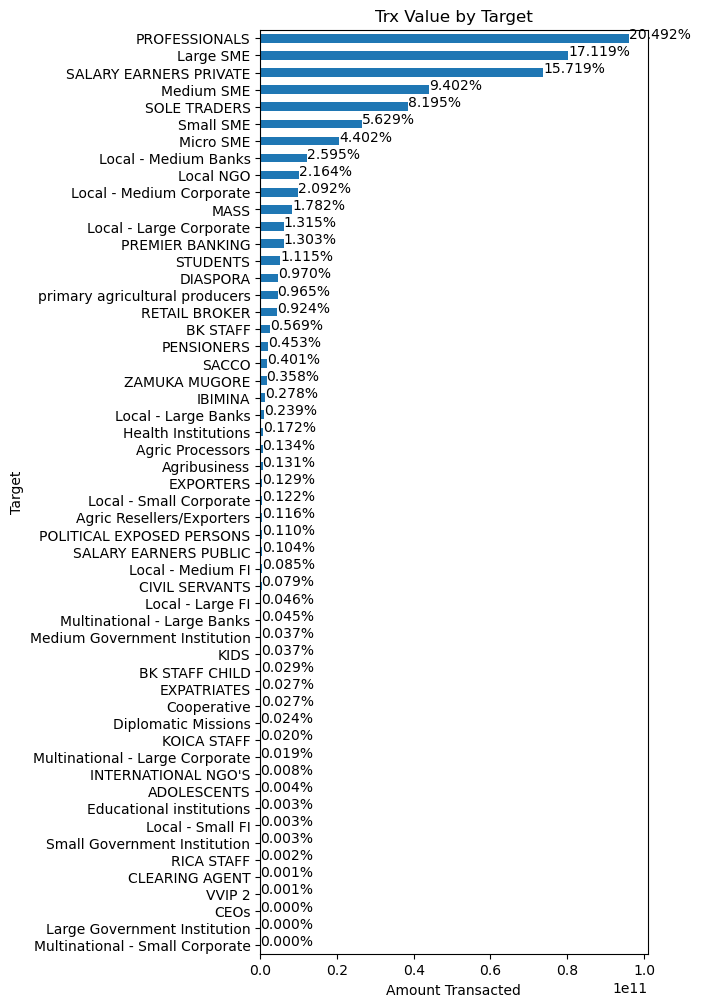

In [108]:
# plt.figure(figsize=(5,12))
# ax=all_teller.groupby('DESCRIPTION')['CUSTOMER_2'].nunique().sort_values().plot(kind='barh')
# total = all_teller['CUSTOMER_2'].nunique()
# for p in ax.patches:
#         percentage = '{:.3f}%'.format(100 * p.get_width()/total)
#         x = p.get_x() + p.get_width() + 0.02
#         y = p.get_y() + p.get_height()/2
#         ax.annotate(percentage, (x, y))
# plt.ylabel('Target')
# plt.xlabel('Number of customers')
# plt.title('Amount transacted by Target')
# plt.show()


# N =20        
grouped_data = top_branches.groupby('DESCRIPTION')['AMOUNT_LOCAL_2'].sum()

# create a horizontal bar chart
fig, ax = plt.subplots(figsize=(5,12))
grouped_data.sort_values().plot(kind='barh', ax=ax)

# add percentage labels to the chart
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_width()/grouped_data.sum())
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x, y))

# add axis labels and title
ax.set_ylabel('Target')
ax.set_xlabel('Amount Transacted')
ax.set_title('Trx Value by Target')
plt.show()


# # sort grouped_data by descending order and get the top 10 rows
# top_10 = grouped_data.sort_values(ascending=False)[:10]

# # calculate the sum of the top 10 targets
# top_10_sum = top_10.sum()

# # create a horizontal bar chart
# fig, ax = plt.subplots(figsize=(5,8))
# top_10.plot(kind='barh', ax=ax)

# # add percentage labels to the chart based on the sum of the top 10 targets
# for p in ax.patches:
#     percentage = '{:.3f}%'.format(100 * p.get_width()/top_10_sum)
#     x = p.get_x() + p.get_width() + 0.02
#     y = p.get_y() + p.get_height()/2
#     ax.annotate(percentage, (x, y))

# # add axis labels and title
# ax.set_ylabel('Target')
# ax.set_xlabel('Amount Transacted')
# ax.set_title('Top 10 Targets by Amount Transacted')
# plt.show()


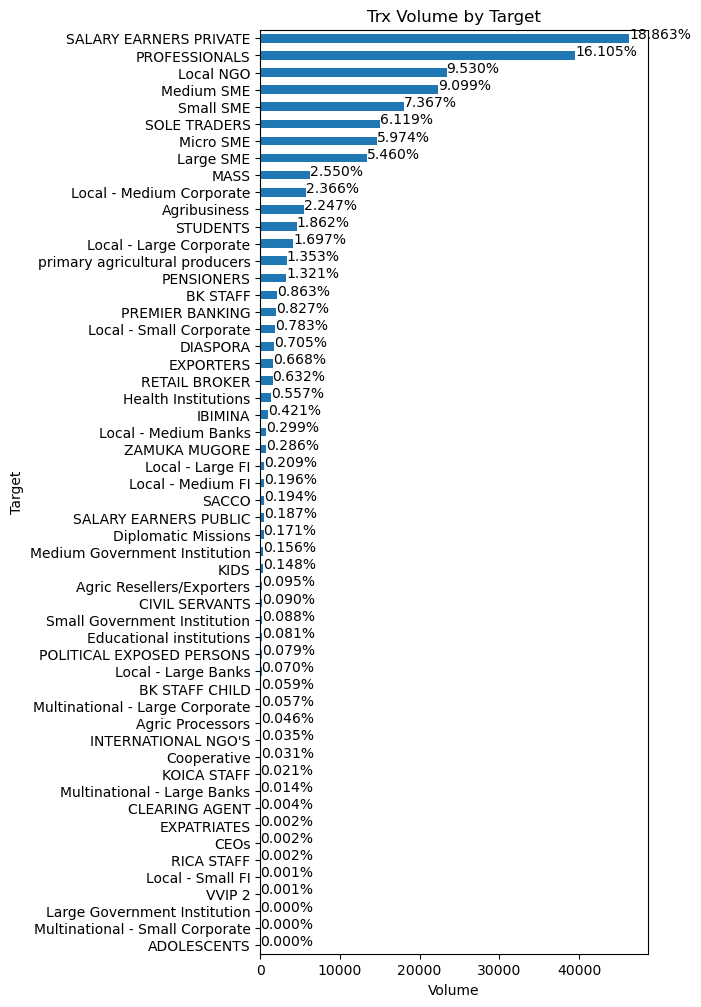

In [109]:
# plt.figure(figsize=(5,12))
# ax=all_teller.groupby('DESCRIPTION')['CUSTOMER_2'].nunique().sort_values().plot(kind='barh')
# total = all_teller['CUSTOMER_2'].nunique()
# for p in ax.patches:
#         percentage = '{:.3f}%'.format(100 * p.get_width()/total)
#         x = p.get_x() + p.get_width() + 0.02
#         y = p.get_y() + p.get_height()/2
#         ax.annotate(percentage, (x, y))
# plt.ylabel('Target')
# plt.xlabel('Number of customers')
# plt.title('Amount transacted by Target')
# plt.show()


# N =20        
grouped_data = top_branches.groupby('DESCRIPTION')['RECID'].count()

# create a horizontal bar chart
fig, ax = plt.subplots(figsize=(5,12))
grouped_data.sort_values().plot(kind='barh', ax=ax)

# add percentage labels to the chart
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_width()/grouped_data.sum())
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x, y))

# add axis labels and title
ax.set_ylabel('Target')
ax.set_xlabel('Volume')
ax.set_title('Trx Volume by Target')
plt.show()


# # sort grouped_data by descending order and get the top 10 rows
# top_10 = grouped_data.sort_values(ascending=False)[:10]

# # calculate the sum of the top 10 targets
# top_10_sum = top_10.sum()

# # create a horizontal bar chart
# fig, ax = plt.subplots(figsize=(5,8))
# top_10.plot(kind='barh', ax=ax)

# # add percentage labels to the chart based on the sum of the top 10 targets
# for p in ax.patches:
#     percentage = '{:.3f}%'.format(100 * p.get_width()/top_10_sum)
#     x = p.get_x() + p.get_width() + 0.02
#     y = p.get_y() + p.get_height()/2
#     ax.annotate(percentage, (x, y))

# # add axis labels and title
# ax.set_ylabel('Target')
# ax.set_xlabel('Amount Transacted')
# ax.set_title('Top 10 Targets by Amount Transacted')
# plt.show()


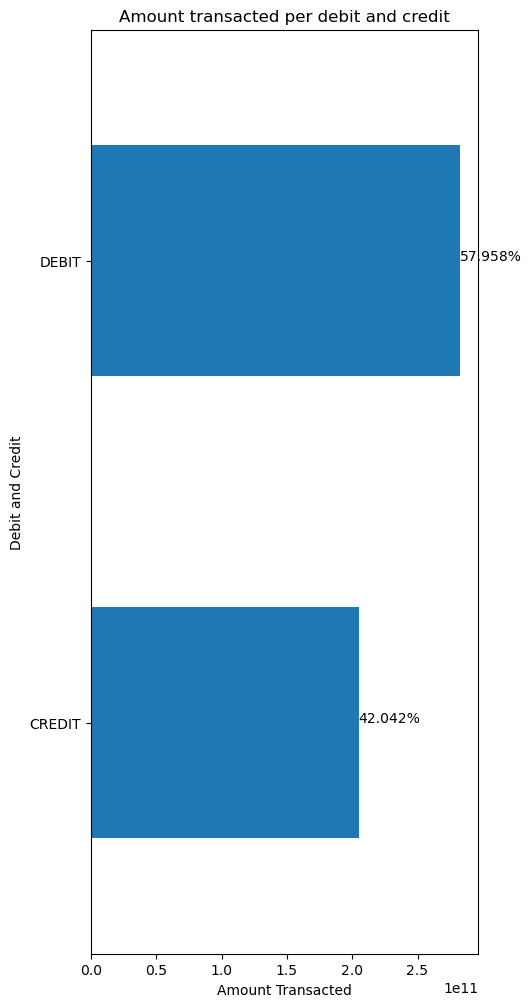

In [110]:
# plt.figure(figsize=(10,9))
# ax=all_teller.groupby('DR_CR_MARKER')['AMOUNT_LOCAL_2'].nunique().sort_values().plot(kind='barh')
# total = all_teller['CUSTOMER_2'].nunique()
# for p in ax.patches:
#         percentage = '{:.3f}%'.format(100 * p.get_width()/total)
#         x = p.get_x() + p.get_width() + 0.02
#         y = p.get_y() + p.get_height()/2
#         ax.annotate(percentage, (x, y))
# plt.ylabel('Target')
# plt.xlabel('Amount Transacted')
# plt.title('Type of Transaction')
# plt.show()


# create a horizontal bar chart
fig, ax = plt.subplots(figsize=(5,12))
top_branches.groupby('DR_CR_MARKER')['AMOUNT_LOCAL_2'].sum().sort_values().plot(kind='barh', ax=ax)

# add percentage labels to the chart
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_width()/(top_branches.groupby('DR_CR_MARKER')['AMOUNT_LOCAL_2'].sum().sort_values().sum()))
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x, y))

# add axis labels and title
ax.set_ylabel('Debit and Credit')
ax.set_xlabel('Amount Transacted')
ax.set_title('Amount transacted per debit and credit')
plt.show()

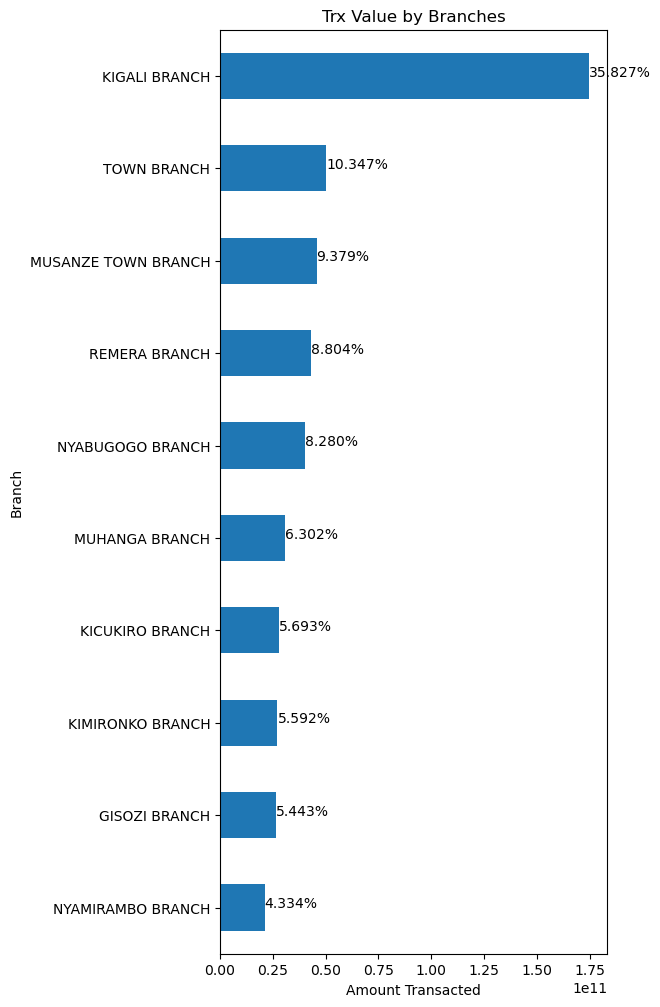

In [111]:

        
        
grouped_data = top_branches.groupby('COMPANY_NAME')['AMOUNT_LOCAL_2'].sum()

# create a horizontal bar chart
fig, ax = plt.subplots(figsize=(5,12))
grouped_data.sort_values().plot(kind='barh', ax=ax)

# add percentage labels to the chart
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_width()/grouped_data.sum())
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x, y))

# add axis labels and title
ax.set_ylabel('Branch')
ax.set_xlabel('Amount Transacted')
ax.set_title('Trx Value by Branches')
plt.show()








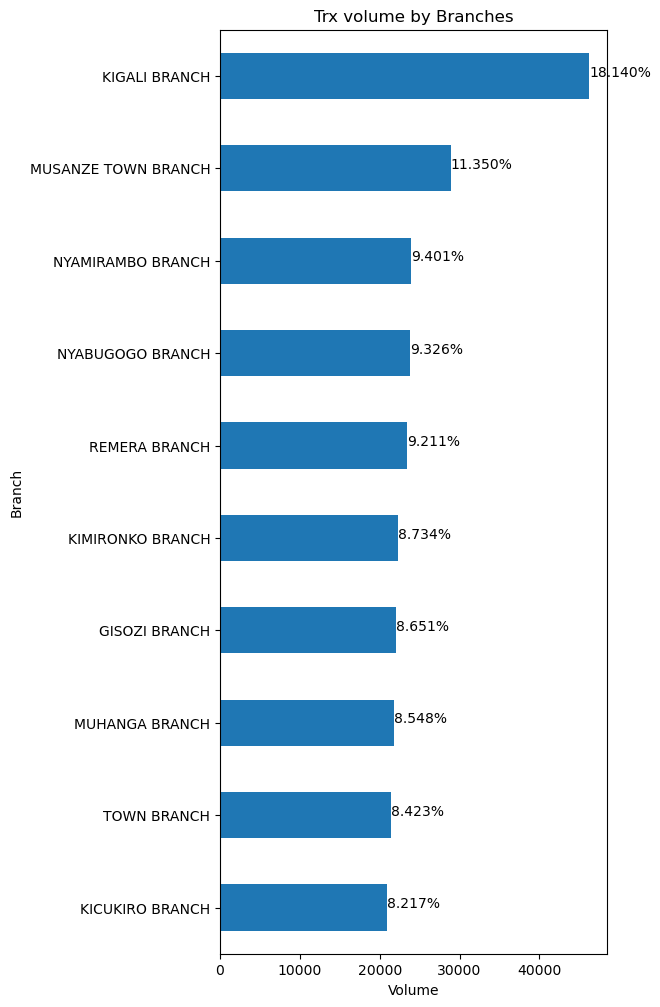

In [112]:

        
        
grouped_data = top_branches.groupby('COMPANY_NAME')['RECID'].count()

# create a horizontal bar chart
fig, ax = plt.subplots(figsize=(5,12))
grouped_data.sort_values().plot(kind='barh', ax=ax)

# add percentage labels to the chart
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_width()/grouped_data.sum())
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x, y))

# add axis labels and title
ax.set_ylabel('Branch')
ax.set_xlabel('Volume')
ax.set_title('Trx volume by Branches')
plt.show()








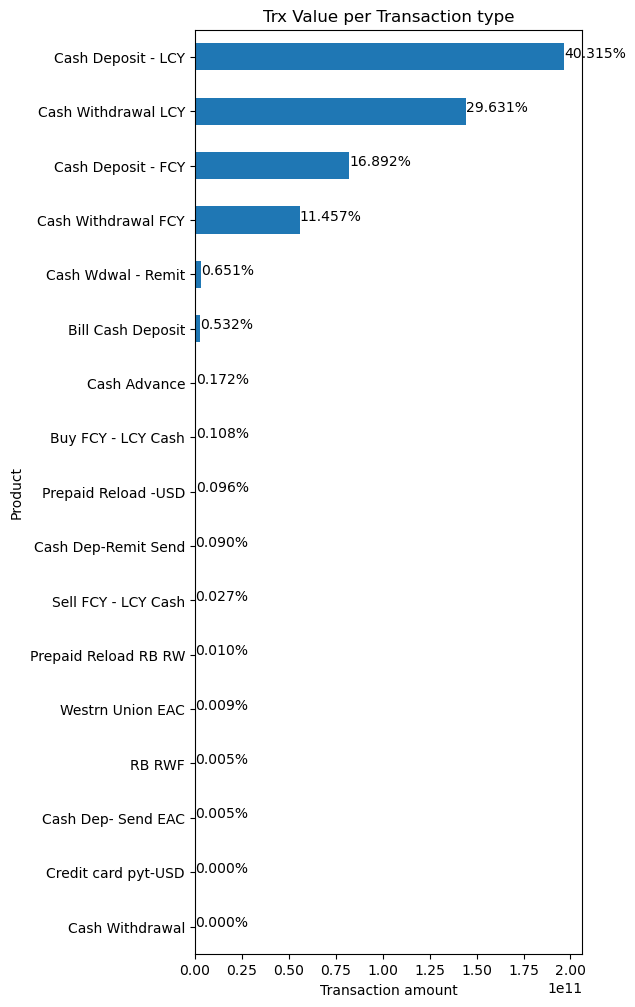

In [113]:
grouped_data = top_branches.groupby('SHORT_DESC')['AMOUNT_LOCAL_2'].sum()

# create a horizontal bar chart
fig, ax = plt.subplots(figsize=(5,12))
grouped_data.sort_values().plot(kind='barh', ax=ax)

# add percentage labels to the chart
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_width()/grouped_data.sum())
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x, y))

# add axis labels and title
ax.set_ylabel('Product')
ax.set_xlabel('Transaction amount')
ax.set_title('Trx Value per Transaction type')
plt.show()



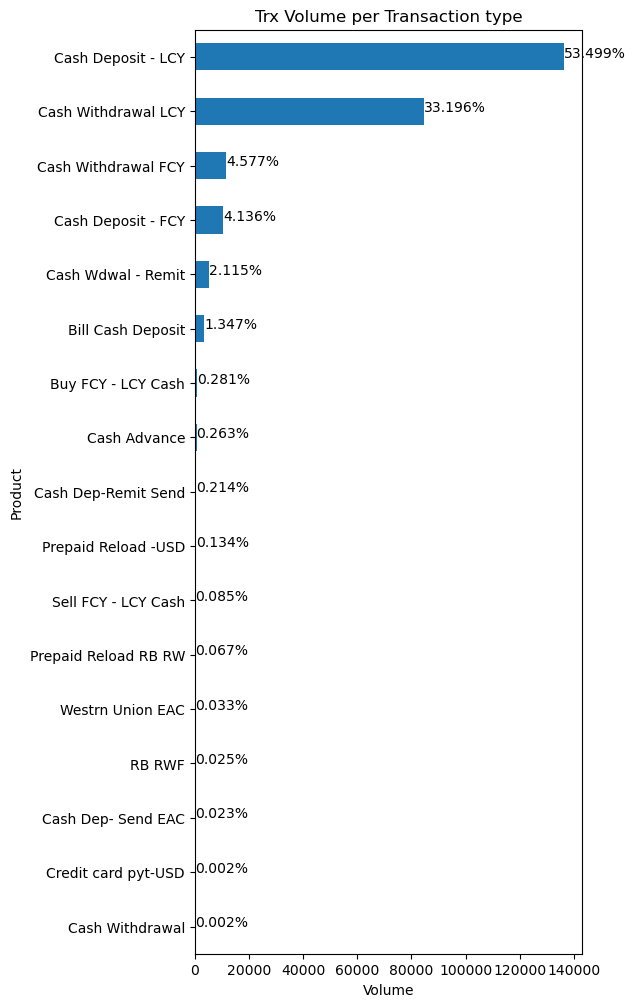

In [114]:
grouped_data = top_branches.groupby('SHORT_DESC')['RECID'].count()
grouped_data
# cregrouped_dataate a horizontal bar chart
fig, ax = plt.subplots(figsize=(5,12))
grouped_data.sort_values().plot(kind='barh', ax=ax)

# add percentage labels to the chart
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_width()/grouped_data.sum())
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x, y))

# add axis labels and title
ax.set_ylabel('Product')
ax.set_xlabel('Volume')
ax.set_title('Trx Volume per Transaction type')
plt.show()



AttributeError: 'AxesSubplot' object has no attribute 'sum'

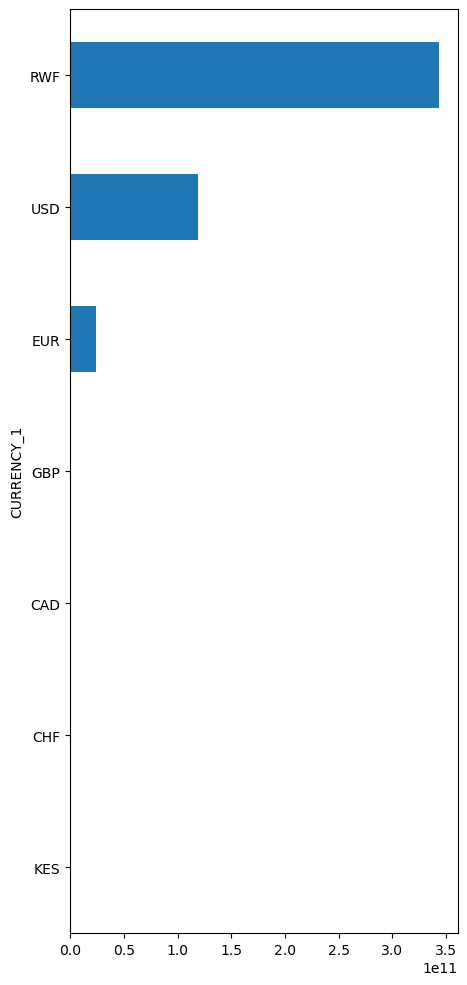

In [115]:
fig, ax = plt.subplots(figsize=(5,12))
grouped = top_branches.groupby('CURRENCY_1')['AMOUNT_LOCAL_2'].sum().sort_values().plot(kind='barh', ax=ax)

# add percentage labels to the chart
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_width()/grouped.sum())
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x, y))

# add axis labels and title
ax.set_ylabel('Currency')
ax.set_xlabel('Amount Transacted')
ax.set_title('Amount transacted by Currency')
plt.show()


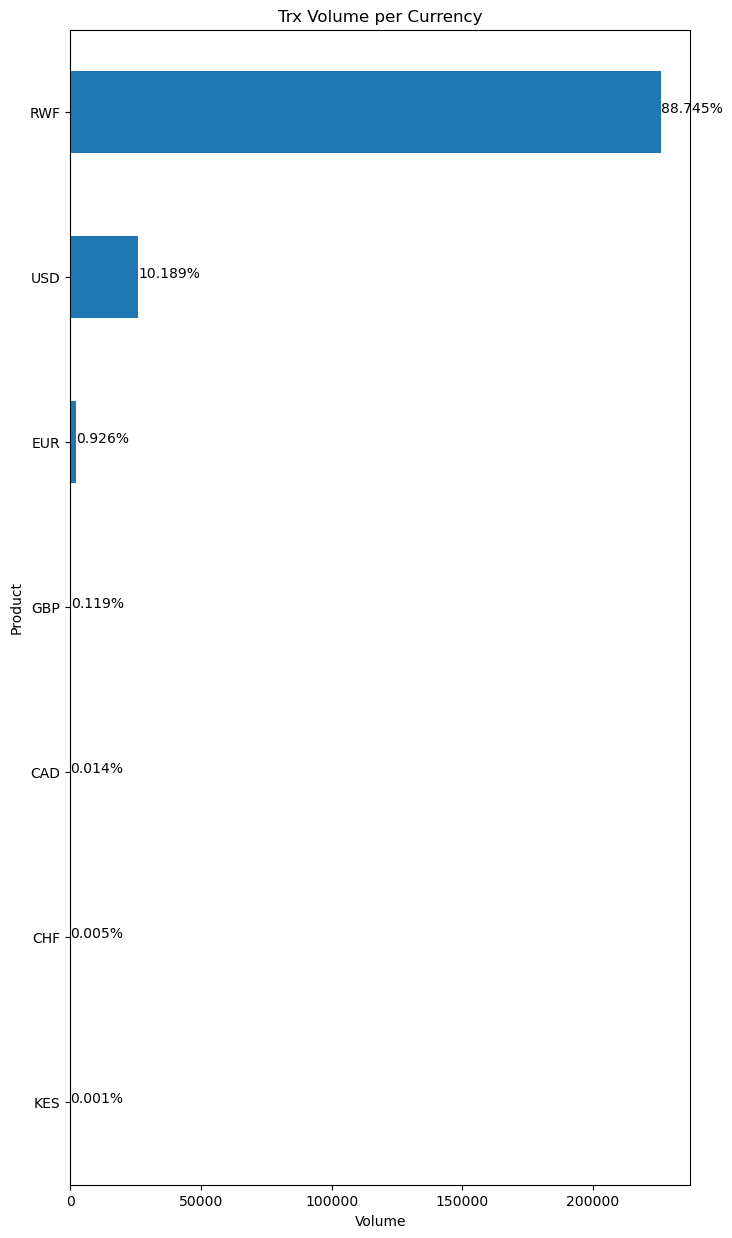

In [116]:


grouped_data = top_branches.groupby('CURRENCY_1')['RECID'].count()
grouped_data
# cregrouped_dataate a horizontal bar chart
fig, ax = plt.subplots(figsize=(8,15))
grouped_data.sort_values().plot(kind='barh', ax=ax)

# add percentage labels to the chart
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_width()/grouped_data.sum())
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x, y))

# add axis labels and title
ax.set_ylabel('Product')
ax.set_xlabel('Volume')
ax.set_title('Trx Volume per Currency')
plt.show()




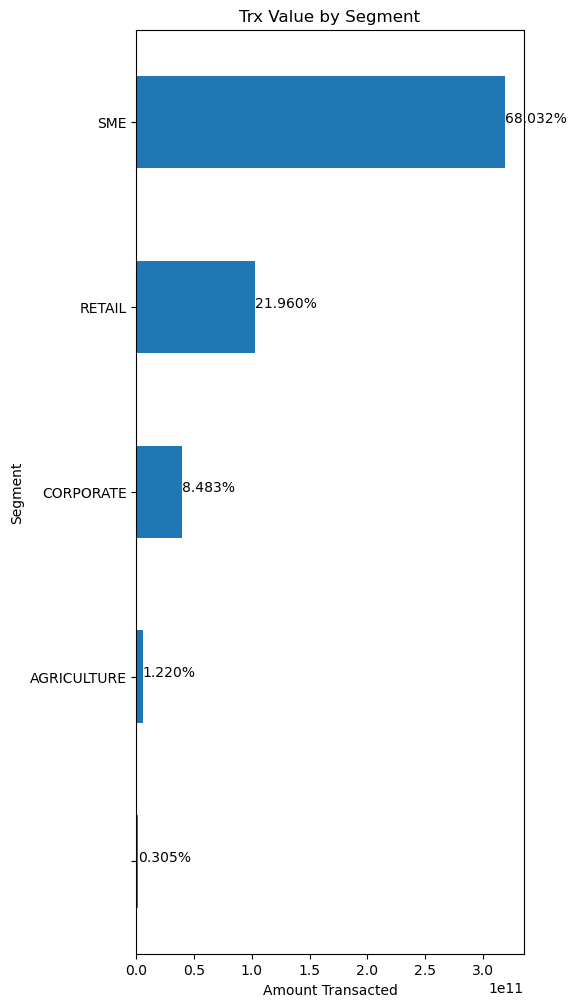

In [118]:

# removed all internal accounts
fig, ax = plt.subplots(figsize=(5,12))
top_branches_without_intacc.groupby('SEGMENT')['AMOUNT_LOCAL_2'].sum().sort_values().plot(kind='barh', ax=ax)

# add percentage labels to the chart
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_width()/top_branches_without_intacc.groupby('SEGMENT')['AMOUNT_LOCAL_2'].sum().sort_values().sum())
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x, y))

# add axis labels and title
ax.set_ylabel('Segment')
ax.set_xlabel('Amount Transacted')
ax.set_title('Trx Value by Segment')
plt.show()



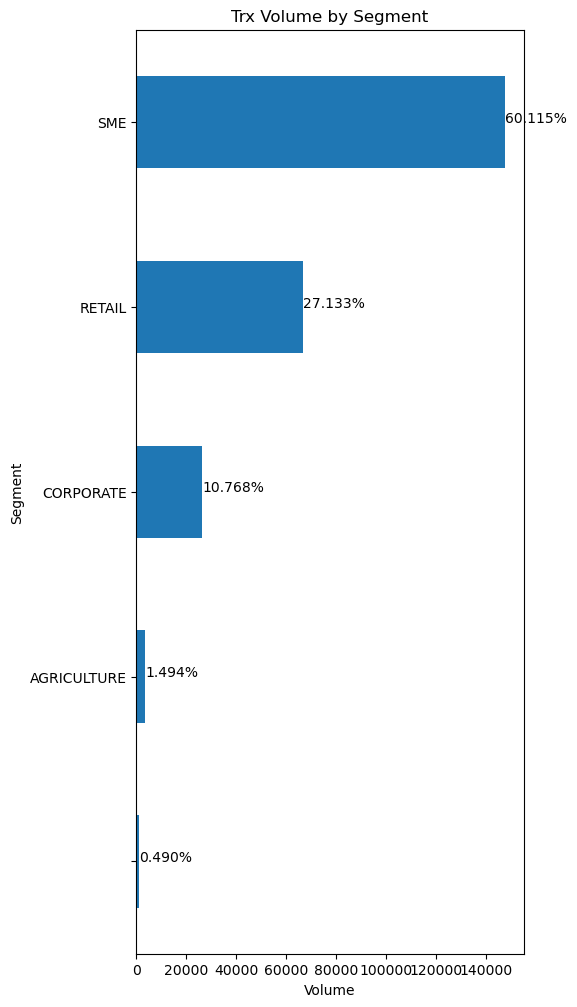

In [119]:

# # removed all internal accounts
# fig, ax = plt.subplots(figsize=(5,12))
# all_teller_without_intacc.groupby('SEGMENT')['RECID'].count().sort_values().plot(kind='barh', ax=ax)

# # add percentage labels to the chart
# for p in ax.patches:
#     percentage = '{:.3f}%'.format(100 * p.get_width()/all_teller_without_intacc.groupby('SEGMENT')['AMOUNT_LOCAL_2'].sum().sort_values().sum())
#     x = p.get_x() + p.get_width() + 0.02
#     y = p.get_y() + p.get_height()/2
#     ax.annotate(percentage, (x, y))

# # add axis labels and title
# ax.set_ylabel('Segment')
# ax.set_xlabel('Amount Transacted')
# ax.set_title('Trx Value by Segment')
# plt.show()



grouped_data = top_branches_without_intacc.groupby('SEGMENT')['RECID'].count()
grouped_data
# cregrouped_dataate a horizontal bar chart
fig, ax = plt.subplots(figsize=(5,12))
grouped_data.sort_values().plot(kind='barh', ax=ax)

# add percentage labels to the chart
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_width()/grouped_data.sum())
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x, y))

# add axis labels and title
ax.set_ylabel('Segment')
ax.set_xlabel('Volume')
ax.set_title('Trx Volume by Segment')
plt.show()



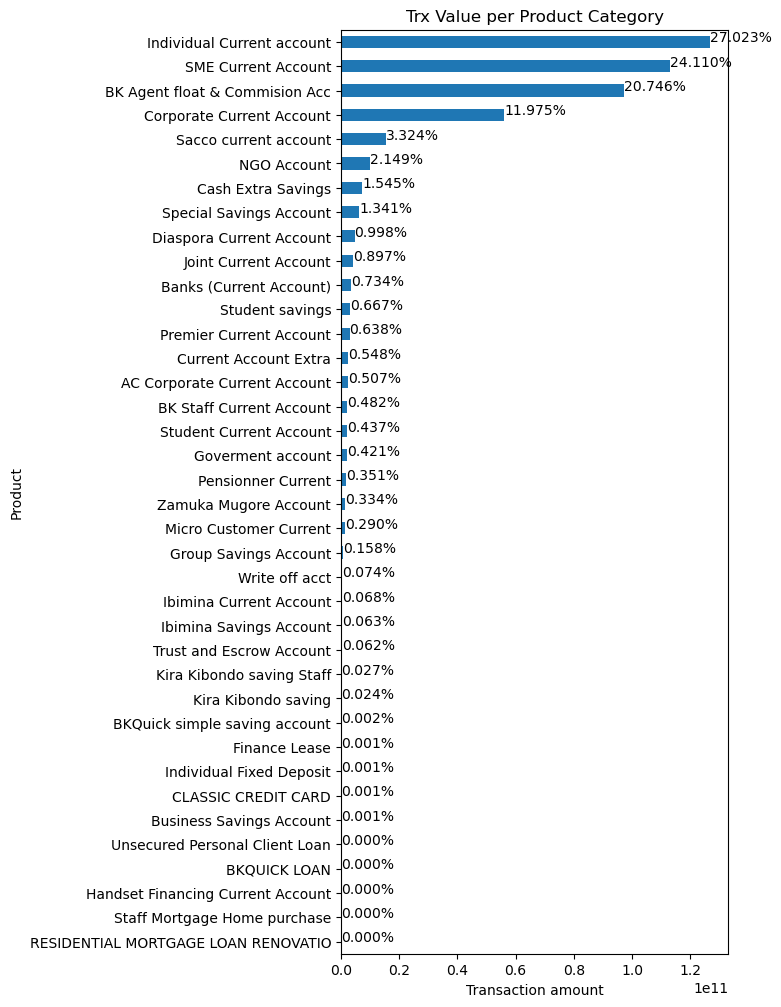

In [120]:
# fig, ax = plt.subplots(figsize=(5,12))
# all_teller.groupby('CATEGORY')['AMOUNT_LOCAL_2'].sum().sort_values().plot(kind='barh', ax=ax)

# # add percentage labels to the chart
# for p in ax.patches:
#     percentage = '{:.3f}%'.format(100 * p.get_width()/all_teller.groupby('CATEGORY')['AMOUNT_LOCAL_2'].sum().sort_values().sum())
#     x = p.get_x() + p.get_width() + 0.02
#     y = p.get_y() + p.get_height()/2
#     ax.annotate(percentage, (x, y))

# # add axis labels and title
# ax.set_ylabel('Category')
# ax.set_xlabel('Amount Transacted')
# ax.set_title('Transaction Value by Product Category')
# plt.show()



grouped_data = top_branches.groupby('CATEGORY')['AMOUNT_LOCAL_2'].sum()
grouped_data
# cregrouped_dataate a horizontal bar chart
fig, ax = plt.subplots(figsize=(5,12))
grouped_data.sort_values().plot(kind='barh', ax=ax)

# add percentage labels to the chart
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_width()/grouped_data.sum())
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x, y))

# add axis labels and title
ax.set_ylabel('Product')
ax.set_xlabel('Transaction amount')
ax.set_title('Trx Value per Product Category')
plt.show()




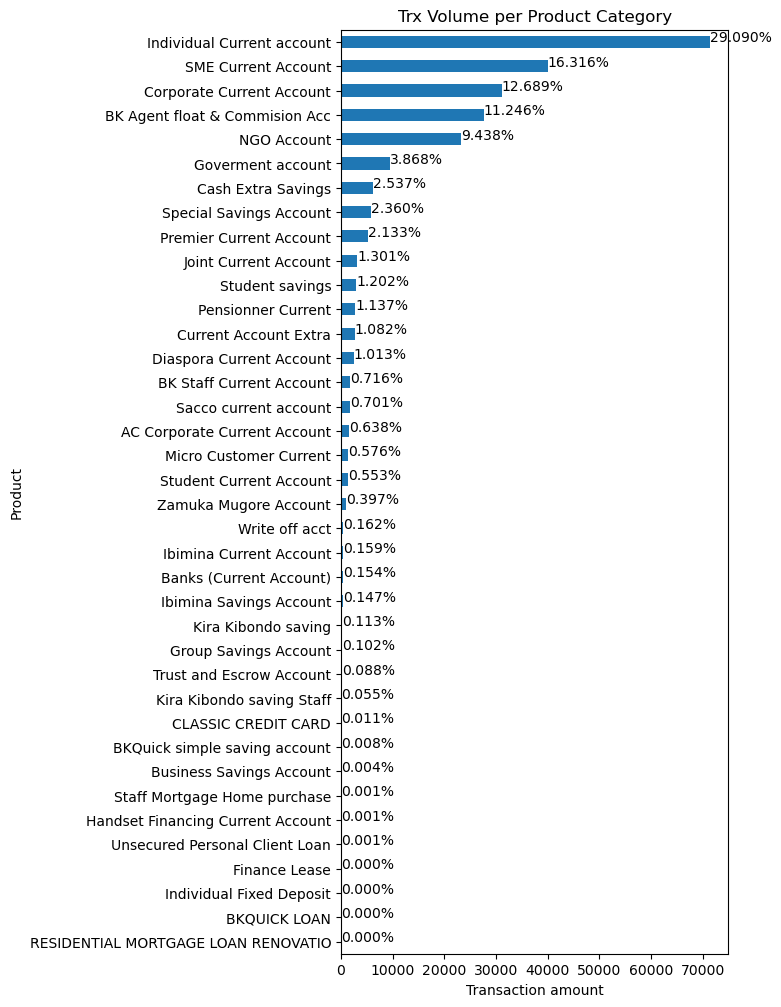

In [121]:
# fig, ax = plt.subplots(figsize=(5,12))
# grouped = all_teller.groupby('CATEGORY')['RECID'].count().sort_values().plot(kind='barh', ax=ax)

# # add percentage labels to the chart
# for p in ax.patches:
#     percentage = '{:.3f}%'.format(100 * p.get_width()/grouped.sum())
#     x = p.get_x() + p.get_width() + 0.02
#     y = p.get_y() + p.get_height()/2
#     ax.annotate(percentage, (x, y))

# # add axis labels and title
# ax.set_ylabel('Category')
# ax.set_xlabel('Amount Transacted')
# ax.set_title('Amount transacted by Product Category')
# plt.show()


grouped_data = top_branches.groupby('CATEGORY')['RECID'].count()
grouped_data
# cregrouped_dataate a horizontal bar chart
fig, ax = plt.subplots(figsize=(5,12))
grouped_data.sort_values().plot(kind='barh', ax=ax)

# add percentage labels to the chart
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_width()/grouped_data.sum())
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x, y))

# add axis labels and title
ax.set_ylabel('Product')
ax.set_xlabel('Transaction amount')
ax.set_title('Trx Volume per Product Category')
plt.show()



TypeError: unsupported format string passed to Series.__format__

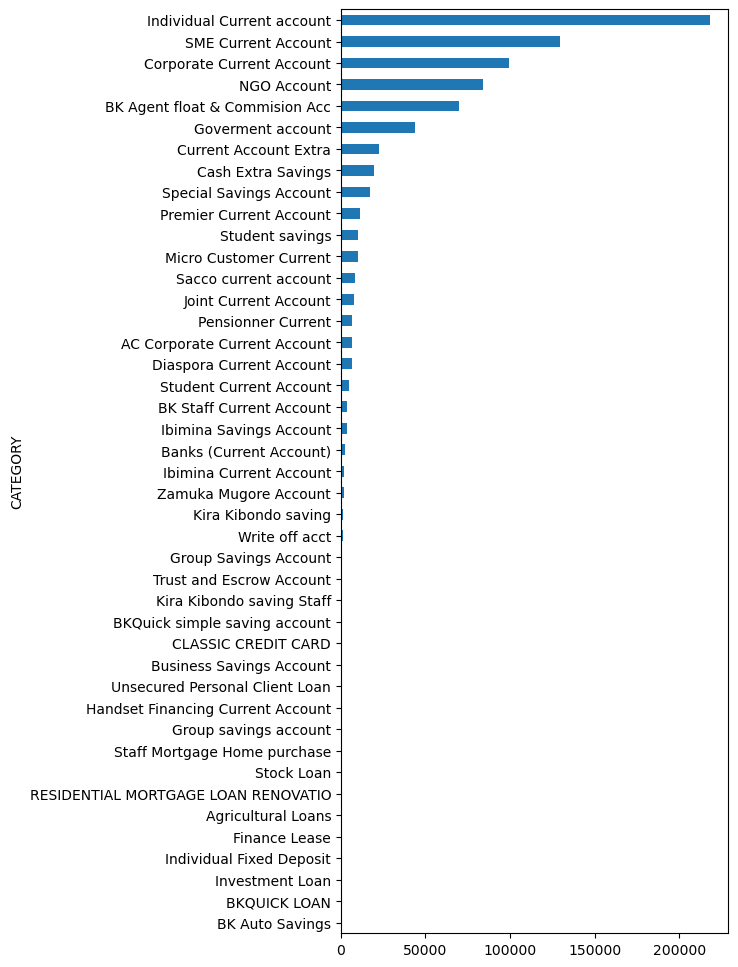

In [12]:
fig, ax = plt.subplots(figsize=(5,12))
all_teller.groupby('CATEGORY')['RECID'].count().sort_values().plot(kind='barh', ax=ax)

# add percentage labels to the chart
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_width()/all_teller.groupby('CATEGORY')['RECID'].count().sort_values())
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x, y))

# add axis labels and title
ax.set_ylabel('Category')
ax.set_xlabel('Amount Transacted')
ax.set_title('Amount transacted by Product Category')
plt.show()

<Figure size 900x1200 with 0 Axes>

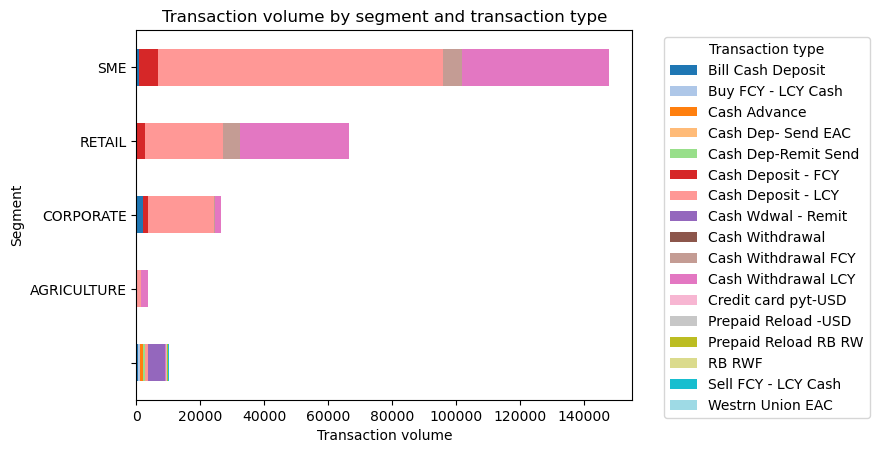

In [122]:
# import matplotlib.pyplot as plt
# import matplotlib.cm as cm
# import numpy as np

plt.figure(figsize=(9, 12))

# Count the number of unique SHORT_DESC values
num_short_desc = len(top_branches['SHORT_DESC'].unique())

# Create a list of unique colors from the colormap
colors = [cmap(i) for i in np.linspace(0, 1, num_short_desc)]
ax = top_branches.groupby(['SEGMENT', 'SHORT_DESC'])['RECID'].count().unstack().plot(kind='barh', stacked=True,color=colors)
plt.ylabel('Segment')
plt.xlabel('Transaction volume')
plt.title('Transaction volume by segment and transaction type')
plt.legend(title='Transaction type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


<Figure size 900x1200 with 0 Axes>

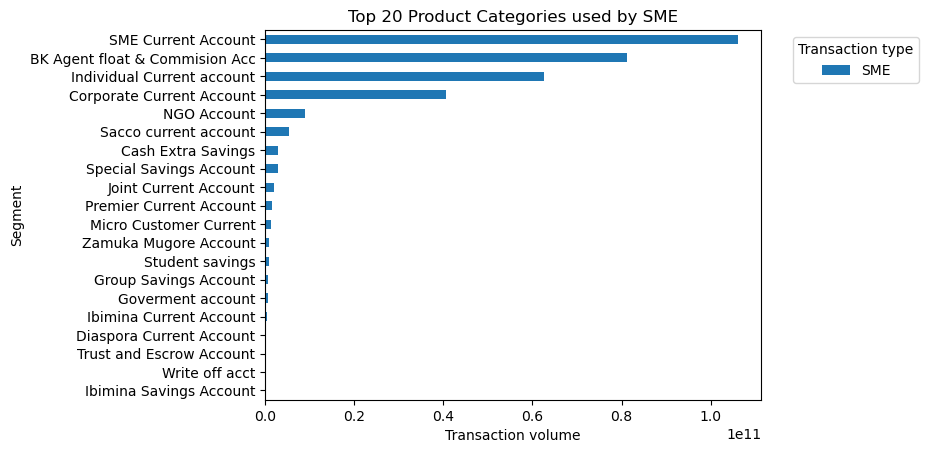

In [123]:
desired_segment = 'SME'
N = 20
df_segment = top_branches[top_branches['SEGMENT'] == desired_segment]

# Sort data by transaction volume
df_segment = df_segment.groupby(['CATEGORY', 'SEGMENT'])['AMOUNT_LOCAL_2'].sum().unstack()
df_segment = df_segment.sort_values(by='SME', ascending=False)


# Get the top N transactions
top_N = df_segment['SME'].nlargest(N)

# Filter the original dataframe to include only the top N transactions
df_top_N = df_segment.loc[top_N.index]

# Plot the transaction volume for the desired segment
plt.figure(figsize=(9, 12))
ax = df_top_N.iloc[::-1].plot(kind='barh', stacked=True)
plt.ylabel('Segment')
plt.xlabel('Transaction volume')
plt.title(f'Top {N} Product Categories used by {desired_segment}')
plt.legend(title='Transaction type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



<Figure size 900x1200 with 0 Axes>

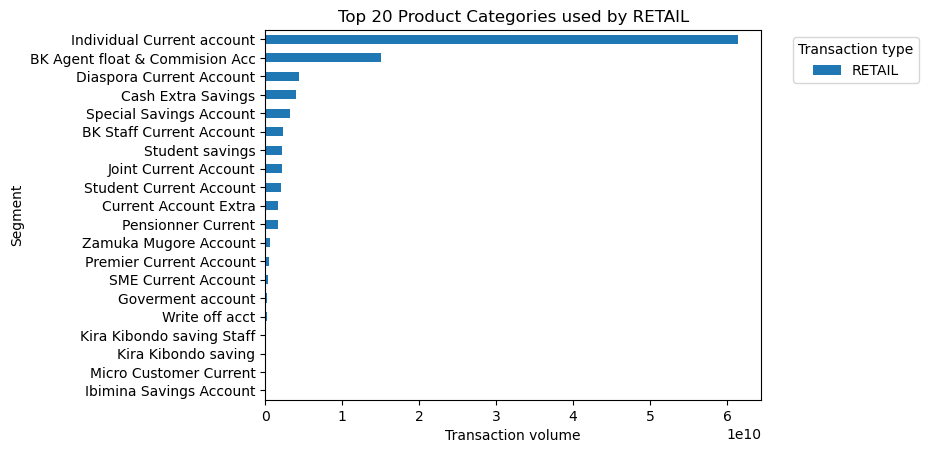

In [124]:
desired_segment = 'RETAIL'
N = 20
df_segment = top_branches[top_branches['SEGMENT'] == desired_segment]

# Sort data by transaction volume
df_segment = df_segment.groupby(['CATEGORY', 'SEGMENT'])['AMOUNT_LOCAL_2'].sum().unstack()
df_segment = df_segment.sort_values(by='RETAIL', ascending=False)


# Get the top N transactions
top_N = df_segment['RETAIL'].nlargest(N)

# Filter the original dataframe to include only the top N transactions
df_top_N = df_segment.loc[top_N.index]

# Plot the transaction volume for the desired segment
plt.figure(figsize=(9, 12))
ax = df_top_N.iloc[::-1].plot(kind='barh', stacked=True)
plt.ylabel('Segment')
plt.xlabel('Transaction volume')
plt.title(f'Top {N} Product Categories used by {desired_segment}')
plt.legend(title='Transaction type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



# Individual Current Account

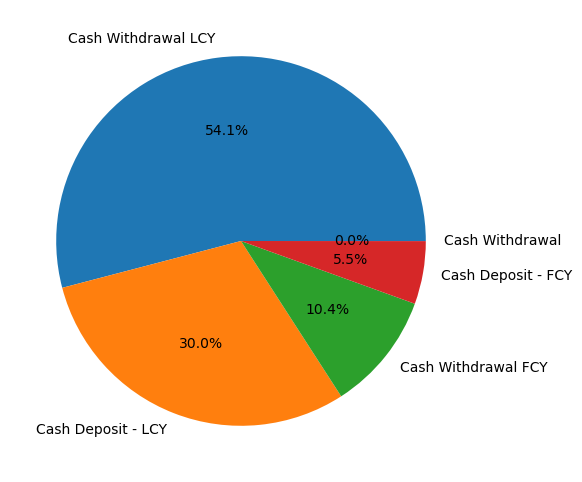

In [125]:
# # Filter the original dataframe to include only transactions with the desired category
# df_category = all_teller[all_teller['CATEGORY'] == 'Individual Current account']

# # Group by transaction type and sum the transaction volume
# df_transaction_type = df_category.groupby('SHORT_DESC')['AMOUNT_LOCAL_2'].sum()

# # Print the result
# df_transaction_type


# desired_segment = 'Individual Current account'
# N = 20
# df_segment = all_teller[all_teller['CATEGORY'] == desired_segment]

# # Sort data by transaction volume
# df_segment = df_segment.groupby(['CATEGORY', 'SHORT_DESC'])['AMOUNT_LOCAL_2'].sum().unstack()
# # df_segment = df_segment.sort_values(by='Individual Current account', ascending=False)


# # Get the top N transactions
# # top_N = df_segment['Individual Current account'].nlargest(N)

# # Filter the original dataframe to include only the top N transactions
# df_top_N = df_segment

# # Plot the transaction volume for the desired segment
# plt.figure(figsize=(9, 12))
# ax = df_top_N.plot(kind='barh', stacked=True)
# plt.ylabel('Category')
# plt.xlabel('Transaction volume')
# plt.title(f'Top {N} Product Categories used by {desired_segment}')
# plt.legend(title='Transaction type', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.show()

desired_segment = 'Individual Current account'
N = 10
df_segment = top_branches[top_branches['CATEGORY'] == desired_segment]

# Sort data by transaction volume
df_segment = df_segment.groupby(['CATEGORY', 'SHORT_DESC'])['RECID'].count().unstack()

# Get the top N transactions
top_N = df_segment.sum(axis=0).nlargest(N)

# Filter the original dataframe to include only the top N transactions
df_top_N = df_segment[top_N.index]

# Create a pie chart of the top N transactions
plt.figure(figsize=(9, 6))
plt.pie(df_top_N.sum(), labels=df_top_N.columns, autopct='%1.1f%%')
# plt.title(f'Top transactions made on {desired_segment} ')
plt.show()


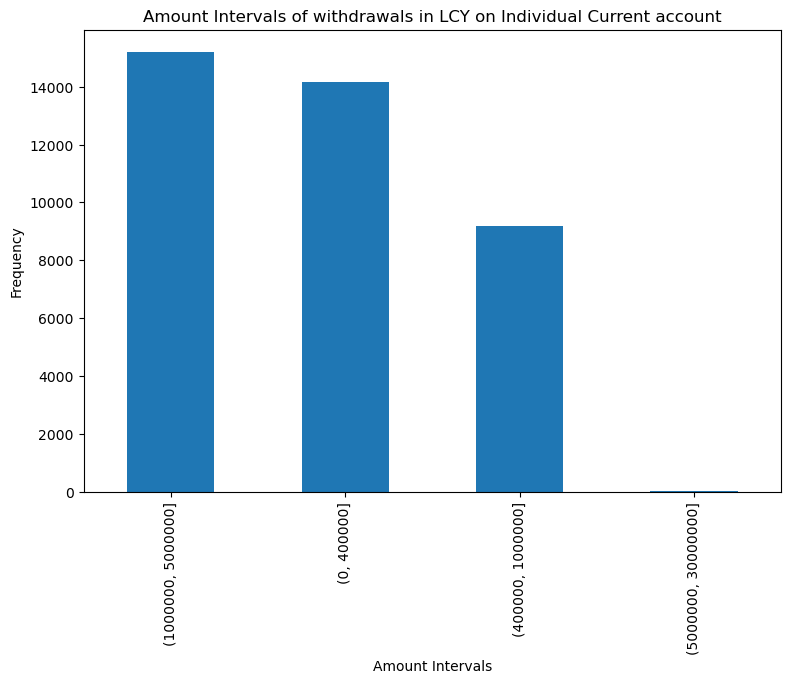

In [126]:
# Filter the dataframe to include only transactions with SHORT_DESC == 'cash deposit' and CATEGORY == 'Individual Current account'
df_filtered = top_branches[(top_branches['SHORT_DESC'] == 'Cash Withdrawal LCY') & (top_branches['CATEGORY'] == 'Individual Current account')]
df_filtered
# # Plot the ranges of AMOUNT_LOCAL_2 using a histogram
plt.figure(figsize=(9, 6))
ranges = [0, 400000, 1000000, 5000000,30000000]
binned = pd.cut(df_filtered['AMOUNT_LOCAL_2'], ranges)

# plot a histogram with the binned data
binned.value_counts().plot(kind='bar')

# set the plot title and axis labels
plt.title('Amount Intervals of withdrawals in LCY on Individual Current account')
plt.xlabel('Amount Intervals')
plt.ylabel('Frequency')

# show the plot
plt.show()
# plt.hist(df_filtered['AMOUNT_LOCAL_2'], bins=100)
# plt.xlabel('AMOUNT_LOCAL_2')
# plt.ylabel('Frequency')
# plt.title('Histogram of AMOUNT_LOCAL_2 for cash deposit transactions in Individual Current account')
# plt.show()



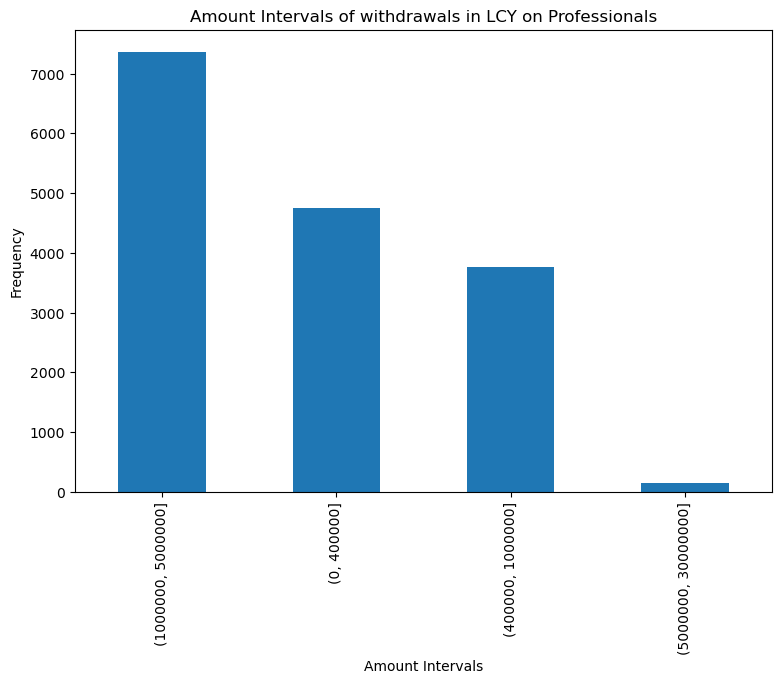

In [127]:
# Filter the dataframe to include only transactions with SHORT_DESC == 'cash deposit' and CATEGORY == 'Individual Current account'
df_filtered = top_branches[(top_branches['SHORT_DESC'] == 'Cash Withdrawal LCY') & (top_branches['DESCRIPTION'] == 'PROFESSIONALS')]
df_filtered
# # Plot the ranges of AMOUNT_LOCAL_2 using a histogram
plt.figure(figsize=(9, 6))
ranges = [0, 400000, 1000000, 5000000,30000000]
binned = pd.cut(df_filtered['AMOUNT_LOCAL_2'], ranges)

# plot a histogram with the binned data
binned.value_counts().plot(kind='bar')

# set the plot title and axis labels
plt.title('Amount Intervals of withdrawals in LCY on Professionals')
plt.xlabel('Amount Intervals')
plt.ylabel('Frequency')

# show the plot
plt.show()
# plt.hist(df_filtered['AMOUNT_LOCAL_2'], bins=100)
# plt.xlabel('AMOUNT_LOCAL_2')
# plt.ylabel('Frequency')
# plt.title('Histogram of AMOUNT_LOCAL_2 for cash deposit transactions in Individual Current account')
# plt.show()



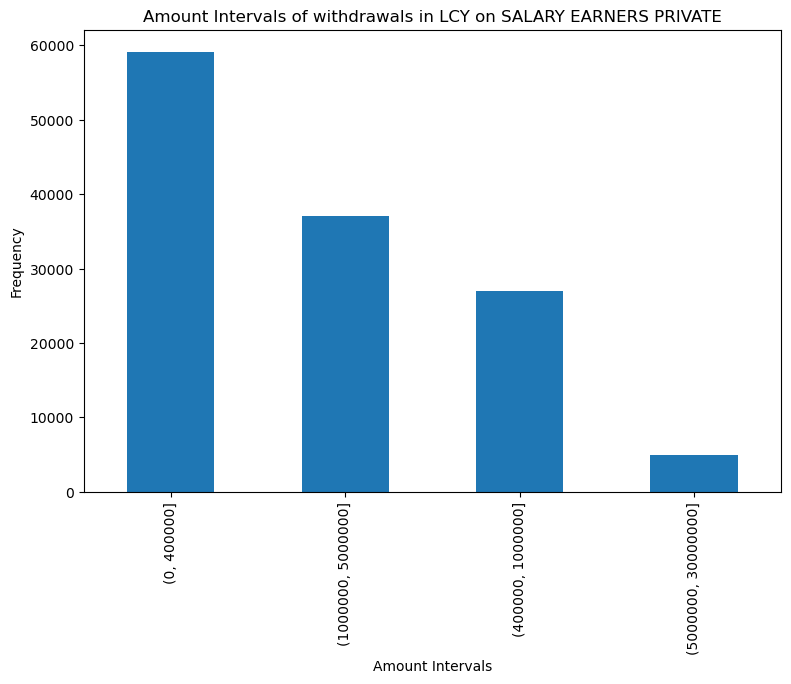

In [24]:
# Filter the dataframe to include only transactions with SHORT_DESC == 'cash deposit' and CATEGORY == 'Individual Current account'
df_filtered = all_teller[(all_teller['DESCRIPTION'] == 'SALARY EARNERS PRIVATE')]
df_filtered
# # Plot the ranges of AMOUNT_LOCAL_2 using a histogram
plt.figure(figsize=(9, 6))
ranges = [0, 400000, 1000000, 5000000,30000000]
binned = pd.cut(df_filtered['AMOUNT_LOCAL_2'], ranges)

# plot a histogram with the binned data
binned.value_counts().plot(kind='bar')

# set the plot title and axis labels
plt.title('Amount Intervals of withdrawals in LCY on SALARY EARNERS PRIVATE')
plt.xlabel('Amount Intervals')
plt.ylabel('Frequency')

# show the plot
plt.show()
# plt.hist(df_filtered['AMOUNT_LOCAL_2'], bins=100)
# plt.xlabel('AMOUNT_LOCAL_2')
# plt.ylabel('Frequency')
# plt.title('Histogram of AMOUNT_LOCAL_2 for cash deposit transactions in Individual Current account')
# plt.show()



<Figure size 900x600 with 0 Axes>

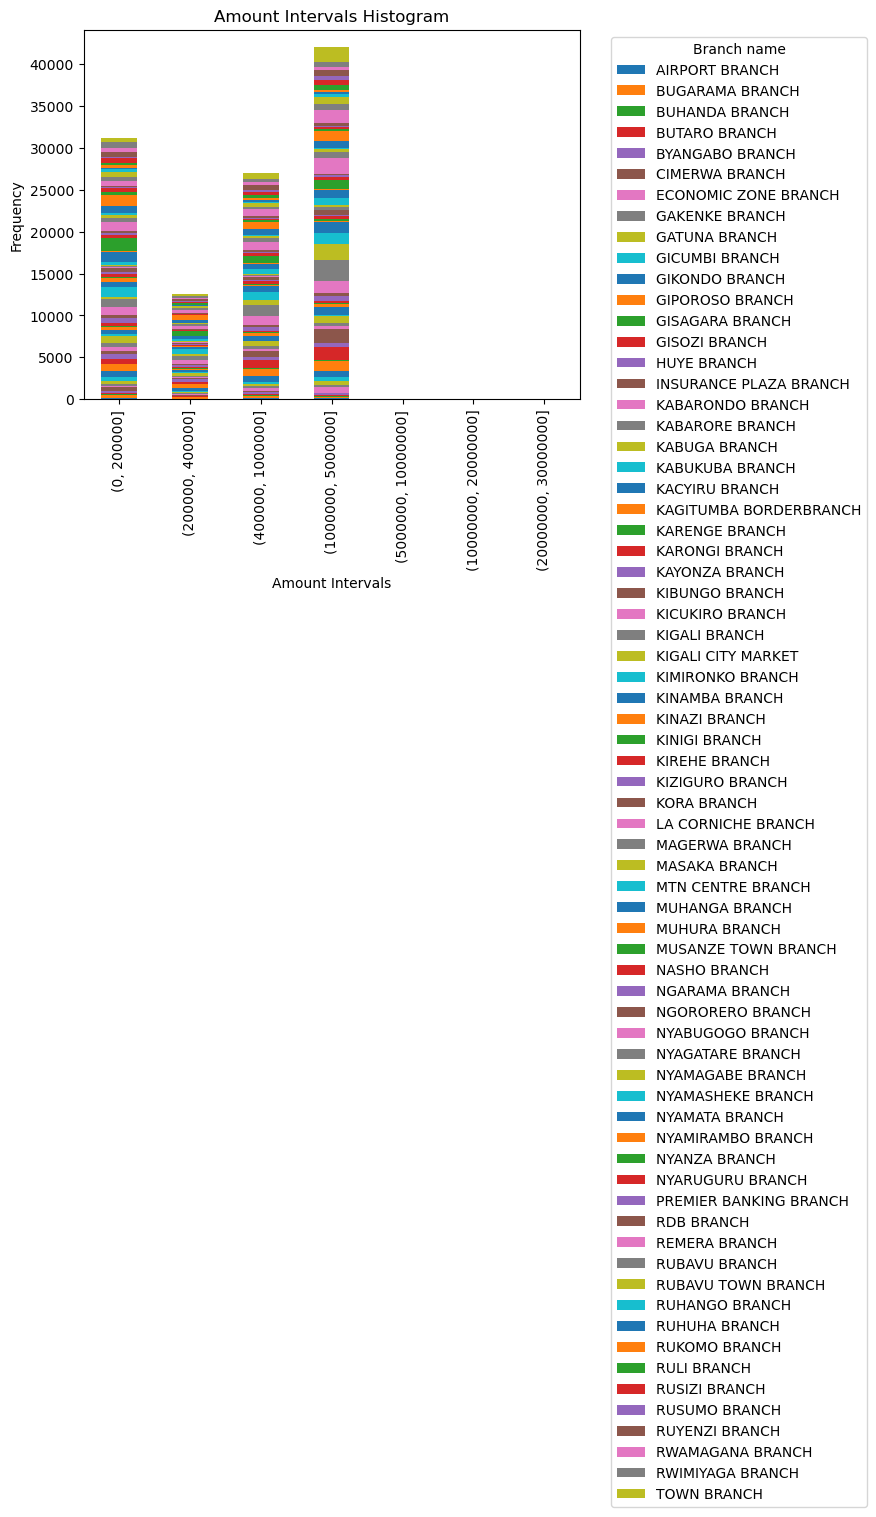

In [114]:
import matplotlib.cm as cm

df_filtered = all_teller[(all_teller['SHORT_DESC'] == 'Cash Withdrawal LCY') & (all_teller['CATEGORY'] == 'Individual Current account')]
df_filtered
# # Plot the ranges of AMOUNT_LOCAL_2 using a histogram
plt.figure(figsize=(9, 6))
ranges = [0, 200000, 400000, 1000000, 5000000,10000000,20000000,30000000]
binned = pd.cut(df_filtered['AMOUNT_LOCAL_2'], ranges)
freqs = df_filtered.groupby([binned, 'COMPANY_NAME']).size().unstack().fillna(0)
# create a color map using the 'tab10' color map from the 'cm' module
colors = cm.tab10.colors
# plot a bar chart with the colored bars
freqs.plot(kind='bar', stacked=True, color=colors)

# set the plot title and axis labels
plt.title('Amount Intervals Histogram')
plt.xlabel('Amount Intervals')
plt.ylabel('Frequency')
plt.legend(title='Branch name', bbox_to_anchor=(1.05, 1), loc='upper left')
# create the legend with unique colors


# show the plot
plt.show()

In [ ]:
all_teller2 = all_teller.drop(labels='Bob', axis=0)

<Figure size 900x600 with 0 Axes>

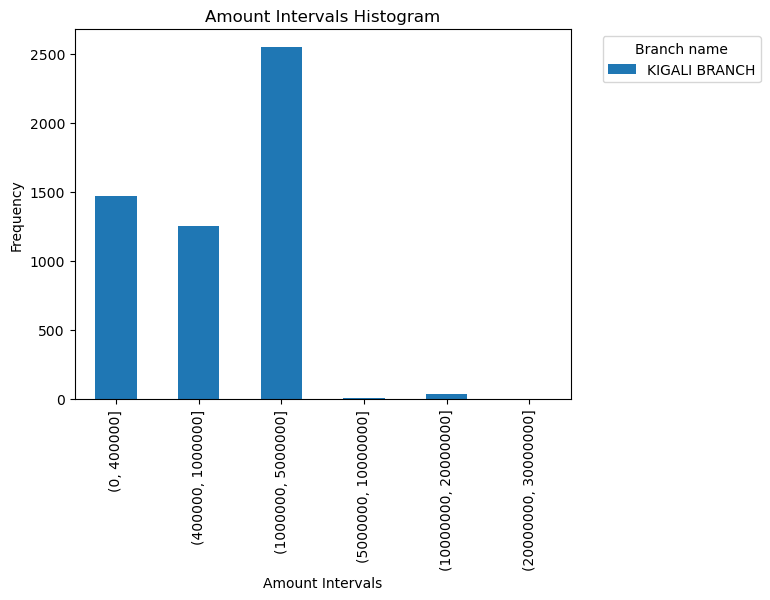

In [14]:
import matplotlib.cm as cm

df_filtered = all_teller[(all_teller['SHORT_DESC'] == 'Cash Withdrawal LCY') & (all_teller['CATEGORY'] == 'Individual Current account') & (all_teller['COMPANY_NAME'] == 'KIGALI BRANCH')]
df_filtered
# # Plot the ranges of AMOUNT_LOCAL_2 using a histogram
plt.figure(figsize=(9, 6))
ranges = [0, 400000, 1000000, 5000000,10000000,20000000,30000000]
binned = pd.cut(df_filtered['AMOUNT_LOCAL_2'], ranges)
freqs = df_filtered.groupby([binned, 'COMPANY_NAME']).size().unstack().fillna(0)
# create a color map using the 'tab10' color map from the 'cm' module
colors = cm.tab10.colors
# plot a bar chart with the colored bars
freqs.plot(kind='bar', stacked=True, color=colors)

# set the plot title and axis labels
plt.title('Amount Intervals Histogram')
plt.xlabel('Amount Intervals')
plt.ylabel('Frequency')
plt.legend(title='Branch name', bbox_to_anchor=(1.05, 1), loc='upper left')
# create the legend with unique colors


# show the plot
plt.show()

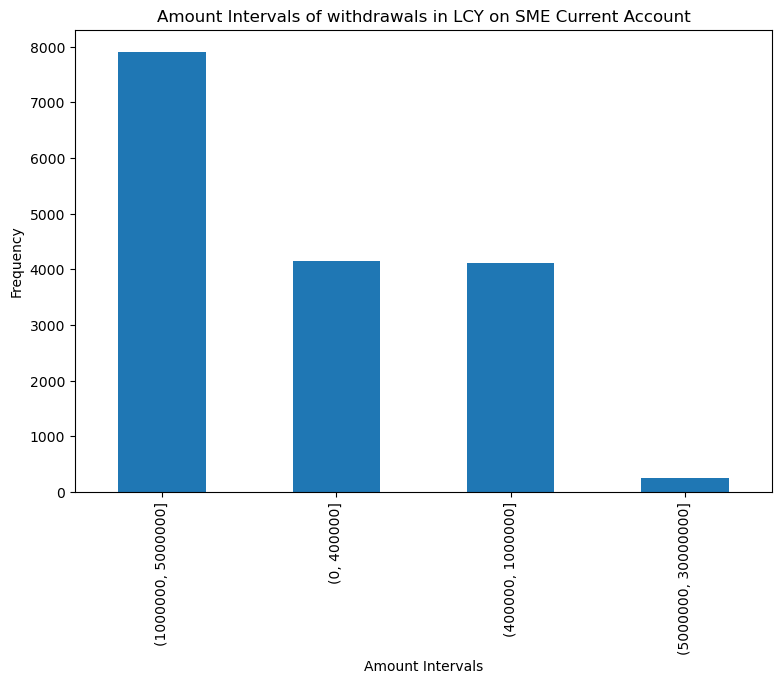

In [128]:
# Filter the dataframe to include only transactions with SHORT_DESC == 'cash deposit' and CATEGORY == 'Individual Current account'
df_filtered = top_branches[(top_branches['SHORT_DESC'] == 'Cash Withdrawal LCY') & (top_branches['CATEGORY'] == 'SME Current Account')]
df_filtered
# # Plot the ranges of AMOUNT_LOCAL_2 using a histogram
plt.figure(figsize=(9, 6))
ranges = [0, 400000, 1000000, 5000000,30000000]
binned = pd.cut(df_filtered['AMOUNT_LOCAL_2'], ranges)

# plot a histogram with the binned data
binned.value_counts().plot(kind='bar')

# set the plot title and axis labels
plt.title('Amount Intervals of withdrawals in LCY on SME Current Account')
plt.xlabel('Amount Intervals')
plt.ylabel('Frequency')

# show the plot
plt.show()
# plt.hist(df_filtered['AMOUNT_LOCAL_2'], bins=100)
# plt.xlabel('AMOUNT_LOCAL_2')
# plt.ylabel('Frequency')
# plt.title('Histogram of AMOUNT_LOCAL_2 for cash deposit transactions in Individual Current account')
# plt.show()



C:\Users\eumuhire\AppData\Local\Temp\ipykernel_24672\3379824635.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['VALUE_DATE_1'] = pd.to_datetime(df_filtered['VALUE_DATE_1'], format='%Y%m%d')


464.96385542168673


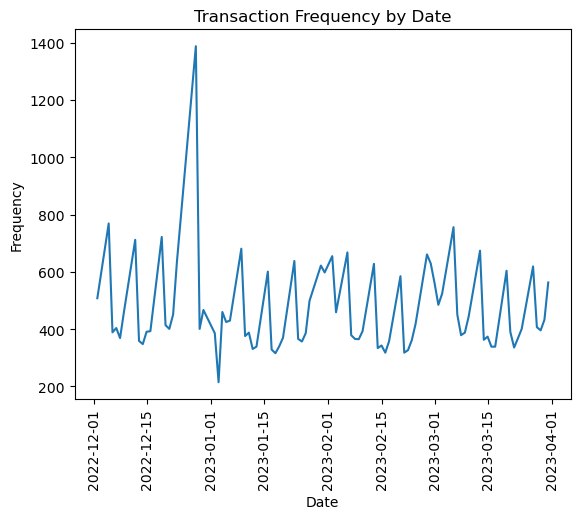

In [129]:
# Filter the dataframe to include only transactions with SHORT_DESC == 'cash deposit' and CATEGORY == 'Individual Current account'
df_filtered = top_branches[(top_branches['SHORT_DESC'] == 'Cash Withdrawal LCY') & (top_branches['CATEGORY'] == 'Individual Current account')]


date_str = '20221202'

# convert the string to a datetime format
df_filtered['VALUE_DATE_1'] = pd.to_datetime(df_filtered['VALUE_DATE_1'], format='%Y%m%d')

df_filtered['VALUE_DATE_1']
df_filtered = df_filtered.drop(df_filtered.loc[df_filtered['VALUE_DATE_1'] == '2023-04-03'].index)
print(df_filtered['VALUE_DATE_1'].value_counts().mean())
data = df_filtered.set_index('VALUE_DATE_1')


# find the date with the highest transaction amount
# max_date = data['z'].idxmax().strftime('%Y-%m-%d')

# print the date with the highest transaction amount
# print('Date with highest transaction amount:', max_date)
# group the data by date and count the number of transactions per date
freqs = data.groupby(level=0)['AMOUNT_LOCAL_2'].count()

# plot the transaction frequency by date
plt.plot(freqs.index, freqs)
# tick_locs = pd.date_range(min(data.index), max(data.index) + pd.DateOffset(days=1), freq='D')[::0]
# tick_labels = [date.strftime('%b %d') for date in tick_locs]
# plt.xticks(tick_locs, tick_labels)

# set the plot title and axis labels
plt.title('Transaction Frequency by Date')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
# show the plot
plt.show()

# Date with highest transaction amount: 2023-02-16



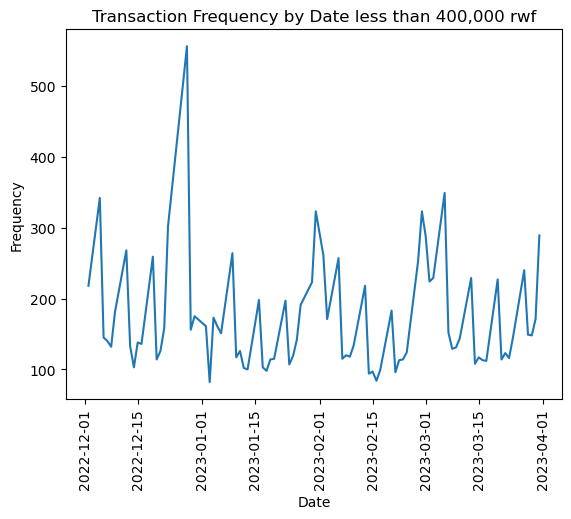

In [130]:
# Filter the dataframe to include only transactions with SHORT_DESC == 'cash deposit' and CATEGORY == 'Individual Current account'
df_filtered = top_branches[(top_branches['SHORT_DESC'] == 'Cash Withdrawal LCY') & (top_branches['CATEGORY'] == 'Individual Current account') & (top_branches['AMOUNT_LOCAL_2'] <= 400000)]
df_filtered = df_filtered.drop(df_filtered.loc[df_filtered['VALUE_DATE_1'] == '20230401'].index)
# df_filtered
date_str = '20221202'

# convert the string to a datetime format
df_filtered['VALUE_DATE_1'] = pd.to_datetime(df_filtered['VALUE_DATE_1'], format='%Y%m%d')
df_filtered = df_filtered.drop(df_filtered.loc[df_filtered['VALUE_DATE_1'] == '2023-04-03'].index)
df_filtered['VALUE_DATE_1']

data = df_filtered.set_index('VALUE_DATE_1')


# find the date with the highest transaction amount
# max_date = data['z'].idxmax().strftime('%Y-%m-%d')

# print the date with the highest transaction amount
# print('Date with highest transaction amount:', max_date)
# group the data by date and count the number of transactions per date
freqs = data.groupby(level=0)['AMOUNT_LOCAL_2'].count()

# plot the transaction frequency by date
plt.plot(freqs.index, freqs)
# tick_locs = pd.date_range(min(data.index), max(data.index) + pd.DateOffset(days=1), freq='D')[::0]
# tick_labels = [date.strftime('%b %d') for date in tick_locs]
# plt.xticks(tick_locs, tick_labels)

# set the plot title and axis labels
plt.title('Transaction Frequency by Date less than 400,000 rwf')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
# show the plot
plt.show()

# Date with highest transaction amount: 2023-02-16



C:\Users\eumuhire\AppData\Local\Temp\ipykernel_24672\2327536287.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['VALUE_DATE_1'] = pd.to_datetime(df_filtered['VALUE_DATE_1'], format='%Y%m%d')


464.96385542168673


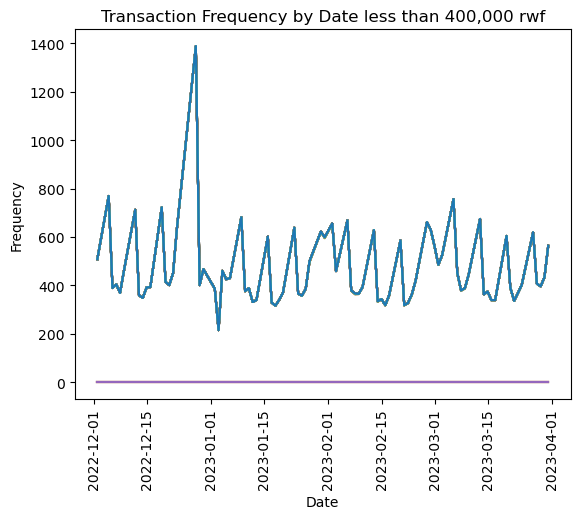

In [132]:
# Filter the dataframe to include only transactions with SHORT_DESC == 'cash deposit' and CATEGORY == 'Individual Current account'
df_filtered = top_branches[(top_branches['SHORT_DESC'] == 'Cash Withdrawal LCY') & (top_branches['CATEGORY'] == 'Individual Current account')]
# df_filtered = df_filtered.drop(df_filtered.loc[df_filtered['VALUE_DATE_1'] == '2023-04-03'].index)
date_str = '20221202'

# convert the string to a datetime format
df_filtered['VALUE_DATE_1'] = pd.to_datetime(df_filtered['VALUE_DATE_1'], format='%Y%m%d')
df_filtered = df_filtered.drop(df_filtered.loc[df_filtered['VALUE_DATE_1'] == '2023-04-03'].index)
print(df_filtered['VALUE_DATE_1'].value_counts().mean())

data = df_filtered.set_index('VALUE_DATE_1')


# find the date with the highest transaction amount
# max_date = data['z'].idxmax().strftime('%Y-%m-%d')

# print the date with the highest transaction amount
# print('Date with highest transaction amount:', max_date)
# group the data by date and count the number of transactions per date
freqs = data.groupby('VALUE_DATE_1',level=0).count()
# print(freqs)
# plot the transaction frequency by date
plt.plot(freqs.index, freqs)
# tick_locs = pd.date_range(min(data.index), max(data.index) + pd.DateOffset(days=1), freq='D')[::0]
# tick_labels = [date.strftime('%b %d') for date in tick_locs]
# plt.xticks(tick_locs, tick_labels)

# set the plot title and axis labels
plt.title('Transaction Frequency by Date less than 400,000 rwf')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
# show the plot
plt.show()

# Date with highest transaction amount: 2023-02-16



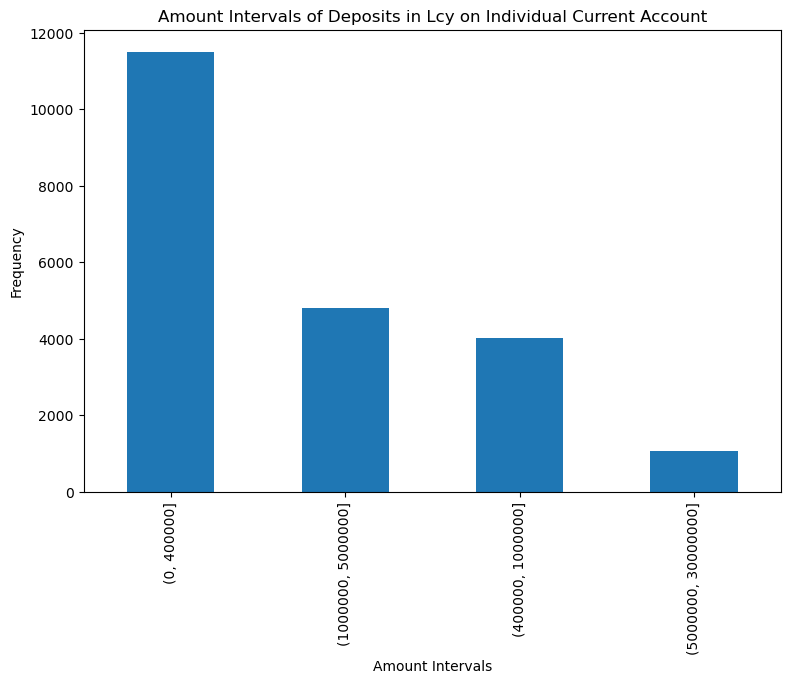

In [133]:
# Filter the dataframe to include only transactions with SHORT_DESC == 'cash deposit' and CATEGORY == 'Individual Current account'
df_filtered = top_branches[(top_branches['SHORT_DESC'] == 'Cash Deposit - LCY') & (top_branches['CATEGORY'] == 'Individual Current account')]
df_filtered
# # Plot the ranges of AMOUNT_LOCAL_2 using a histogram
plt.figure(figsize=(9, 6))
ranges = [0, 400000, 1000000, 5000000,30000000]
binned = pd.cut(df_filtered['AMOUNT_LOCAL_2'], ranges)

# plot a histogram with the binned data
binned.value_counts().plot(kind='bar')

# set the plot title and axis labels
plt.title('Amount Intervals of Deposits in Lcy on Individual Current Account')
plt.xlabel('Amount Intervals')
plt.ylabel('Frequency')

# show the plot
plt.show()
# plt.hist(df_filtered['AMOUNT_LOCAL_2'], bins=100)
# plt.xlabel('AMOUNT_LOCAL_2')
# plt.ylabel('Frequency')
# plt.title('Histogram of AMOUNT_LOCAL_2 for cash deposit transactions in Individual Current account')
# plt.show()



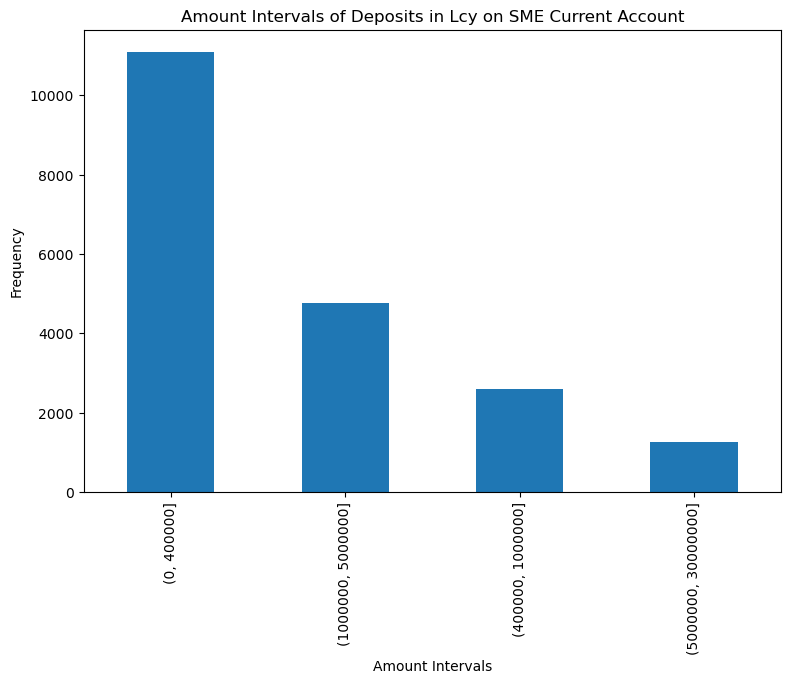

In [134]:
# Filter the dataframe to include only transactions with SHORT_DESC == 'cash deposit' and CATEGORY == 'Individual Current account'
df_filtered = top_branches[(top_branches['SHORT_DESC'] == 'Cash Deposit - LCY') & (top_branches['CATEGORY'] == 'SME Current Account')]
df_filtered
# # Plot the ranges of AMOUNT_LOCAL_2 using a histogram
plt.figure(figsize=(9, 6))
ranges = [0, 400000, 1000000, 5000000,30000000]
binned = pd.cut(df_filtered['AMOUNT_LOCAL_2'], ranges)

# plot a histogram with the binned data
binned.value_counts().plot(kind='bar')

# set the plot title and axis labels
plt.title('Amount Intervals of Deposits in Lcy on SME Current Account')
plt.xlabel('Amount Intervals')
plt.ylabel('Frequency')

# show the plot
plt.show()
# plt.hist(df_filtered['AMOUNT_LOCAL_2'], bins=100)
# plt.xlabel('AMOUNT_LOCAL_2')
# plt.ylabel('Frequency')
# plt.title('Histogram of AMOUNT_LOCAL_2 for cash deposit transactions in Individual Current account')
# plt.show()



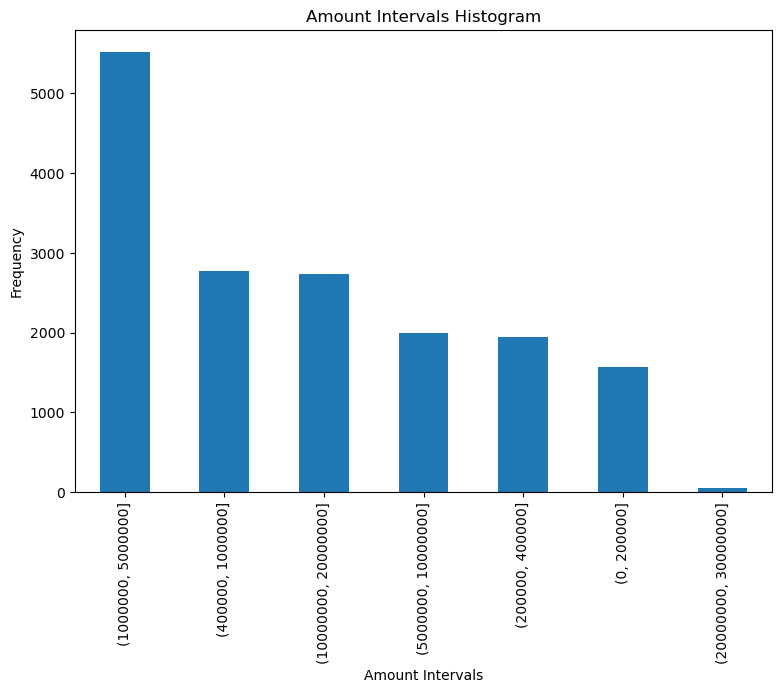

In [143]:
# Filter the dataframe to include only transactions with SHORT_DESC == 'cash deposit' and CATEGORY == 'Individual Current account'
df_filtered = all_teller[(all_teller['SHORT_DESC'] == 'Cash Withdrawal FCY') & (all_teller['CATEGORY'] == 'Individual Current account')]
df_filtered
# # Plot the ranges of AMOUNT_LOCAL_2 using a histogram
plt.figure(figsize=(9, 6))
ranges = [0, 200000, 400000, 1000000, 5000000,10000000,20000000,30000000]
binned = pd.cut(df_filtered['AMOUNT_LOCAL_2'], ranges)

# plot a histogram with the binned data
binned.value_counts().plot(kind='bar')

# set the plot title and axis labels
plt.title('Amount Intervals Histogram')
plt.xlabel('Amount Intervals')
plt.ylabel('Frequency')

# show the plot
plt.show()
# plt.hist(df_filtered['AMOUNT_LOCAL_2'], bins=100)
# plt.xlabel('AMOUNT_LOCAL_2')
# plt.ylabel('Frequency')
# plt.title('Histogram of AMOUNT_LOCAL_2 for cash deposit transactions in Individual Current account')
# plt.show()



In [133]:

# # Filter the dataframe to include only transactions with SHORT_DESC == 'cash deposit' and CATEGORY == 'Individual Current account'
# df_filtered = all_teller[(all_teller['SHORT_DESC'] == 'Cash Withdrawal LCY') & (all_teller['CATEGORY'] == 'Individual Current account')]
# df_filtered
# df_filtered

# date_str = '20221202'

# # convert the string to a datetime format
# df_filtered['VALUE_DATE_1'] = pd.to_datetime(df_filtered['VALUE_DATE_1'], format='%Y%m%d')

# df_filtered['VALUE_DATE_1']

# data = df_filtered.set_index('VALUE_DATE_1')
# # select data for a single date
# single_date = '2023-02-16'
# single_date_data = data.loc[single_date]

# # plot the data for the single date
# plt.plot(single_date_data.index, single_date_data['AMOUNT_LOCAL_2'])
# plt.title(f'Transaction amounts for {single_date}')
# plt.xlabel('Time')
# plt.ylabel('Amount')
# plt.show()


import matplotlib.cm as cm

df_filtered = all_teller[(all_teller['SHORT_DESC'] == 'Cash Withdrawal LCY') & (all_teller['CATEGORY'] == 'Individual Current account')]
df_filtered


df_filtered['VALUE_DATE_1'] = pd.to_datetime(df_filtered['VALUE_DATE_1'], format='%Y%m%d')
data = df_filtered.set_index('VALUE_DATE_1')

single_date = '2022-12-23'
data = data.loc[single_date]
data
# # # Plot the ranges of AMOUNT_LOCAL_2 using a histogram
# plt.figure(figsize=(9, 6))
# ranges = [0, 200000, 400000, 1000000, 5000000,10000000,20000000,30000000]
# binned = pd.cut(data['AMOUNT_LOCAL_2'], ranges)
# freqs = data.groupby([binned, 'COMPANY_NAME']).size().unstack().fillna(0)
# # create a color map using the 'tab10' color map from the 'cm' module
# colors = cm.tab10.colors
# # plot a bar chart with the colored bars
# freqs.plot(kind='bar', stacked=True, color=colors)

# # set the plot title and axis labels
# plt.title('Amount Intervals Histogram')
# plt.xlabel('Amount Intervals')
# plt.ylabel('Frequency')
# plt.legend(title='Branch name', bbox_to_anchor=(1.05, 1), loc='upper left')
# # create the legend with unique colors


# # show the plot
# plt.show()

C:\Users\eumuhire\AppData\Local\Temp\ipykernel_22988\3360152173.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['VALUE_DATE_1'] = pd.to_datetime(df_filtered['VALUE_DATE_1'], format='%Y%m%d')


,RECID,TRANSACTION_CODE,TELLER_ID_1,DR_CR_MARKER,CURRENCY_1,ACCOUNT_1,AMOUNT_LOCAL_1,CURR_MARKET_1,POS_TYPE_1,CURRENCY_2,TELLER_ID_2,ACCOUNT_2,CATEGORY,CUSTOMER_2,AMOUNT_LOCAL_2,RATE_1,DEAL_RATE,AMOUNT_FCY_2,CHRG_AMT_FCCY,CHEQUE_NUMBER,CHEQ_TYPE,NET_AMOUNT,VALUE_DATE_2,EXPOSURE_DATE_2,EXPOSURE_DATE_2.1,POS_TYPE_2,NARRATIVE_2,WAIVE_CHARGES,TT_RECIEVER,AUTH_DATE,INPUTTER,DATE_TIME,AUTHORISER,CO_CODE,DEPT_CODE,SHORT_DESC,TARGET,GENDER,DESCRIPTION,COMPANY_NAME,SEGMENT
VALUE_DATE_1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-12-23,TT223573HM73,5,1700,CREDIT,RWF,RWF1000117001018,237500,10,TR,RWF,1700,100012863882,Individual Current account,1194705.0,237500,NaN,NaN,NaN,NaN,82668310.0,CURR,238000.0,20221223,NaN,NaN,TR,with draw/self,NO,UMWARI BETTY,20221223,11370035_RW002197_I_INAU_OFS_BROWSERTC,2212231055,11370035_RW002197_OFS_BROWSERTC,RW0010018,403558,Cash Withdrawal LCY,73.0,FEMALE,SALARY EARNERS PRIVATE,KAYONZA BRANCH,RETAIL
2022-12-23,TT223574S1PM,5,1004,CREDIT,RWF,RWF1000110041011,250000,10,TR,RWF,1004,100013130487,Individual Current account,1199654.0,250000,NaN,NaN,NaN,NaN,56591508.0,CURR,250500.0,20221223,NaN,NaN,TR,NTAKIRUTIMANA NAHASON,NO,NTAKIRUTIMANA NAHASON,20221223,11369086_RWOUT139_I_INAU_OFS_BROWSERTC,2212231044,11369086_RWOUT139_OFS_BROWSERTC,RW0010011,403594,Cash Withdrawal LCY,72.0,MALE,PROFESSIONALS,HUYE BRANCH,SME
2022-12-23,TT22357FCDHP,5,609,CREDIT,RWF,RWF1000106091007,100000,10,TR,RWF,609,100026667617,Individual Current account,1350030.0,100000,NaN,NaN,NaN,NaN,40667358.0,OCNT,100500.0,20221223,NaN,NaN,TR,WITH/IYAMUREMYE FREDERICK,NO,IYAMUREMYE FREDERICK,20221223,11374971_RW001958_I_INAU_OFS_BROWSERTC,2212231355,11374971_RW001958_OFS_BROWSERTC,RW0010007,403255,Cash Withdrawal LCY,72.0,MALE,PROFESSIONALS,NYABUGOGO BRANCH,SME
2022-12-23,TT22357J0WJZ,5,204,CREDIT,RWF,RWF1000102041003,500000,10,TR,RWF,204,100018946558,Individual Current account,1183717.0,500000,NaN,NaN,NaN,NaN,57833297.0,CURR,500000.0,20221223,NaN,NaN,TR,WITHDRAW,NO,BUGINGO ERIC SABITI,20221223,11372326_RW002575_I_INAU_OFS_BROWSERTC,2212231355,11372326_RW002575_OFS_BROWSERTC,RW0010003,403445,Cash Withdrawal LCY,73.0,MALE,SALARY EARNERS PRIVATE,KACYIRU BRANCH,RETAIL
2022-12-23,TT22357HY9SJ,5,6810,CREDIT,RWF,RWF1000168101069,2000000,10,TR,RWF,6810,100014815478,Individual Current account,1220088.0,2000000,NaN,NaN,NaN,NaN,37834342.0,CURR,2000000.0,20221223,NaN,NaN,TR,EITHDRAW/NDAHAYO VIATEUR,NO,NDAHAYO VIATEUR,20221223,11369306_RW002389_I_INAU_OFS_BROWSERTC,2212231153,11369306_RW002389_OFS_BROWSERTC,RW0010069,403419,Cash Withdrawal LCY,73.0,MALE,SALARY EARNERS PRIVATE,KINAMBA BRANCH,RETAIL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,TT22357999ZV,5,4105,CREDIT,RWF,RWF1000141051042,18000,10,TR,RWF,4105,100009822245,Individual Current account,1151758.0,18000,NaN,NaN,NaN,NaN,39192983.0,CURR,18500.0,20221223,NaN,NaN,TR,rutayisire david,NO,rutayisere david,20221223,11369201_RW002047_I_INAU_OFS_BROWSERTC,2212231146,11369201_RW002047_OFS_BROWSERTC,RW0010042,403281,Cash Withdrawal LCY,73.0,MALE,SALARY EARNERS PRIVATE,RWIMIYAGA BRANCH,RETAIL
2022-12-23,TT22357SK7LV,5,1417,CREDIT,RWF,RWF1000114171015,600000,10,TR,RWF,1417,100005650466,Individual Current account,1086282.0,600000,NaN,NaN,NaN,NaN,74741268.0,CURR,600000.0,20221223,NaN,NaN,TR,NZEYIMANA OSWALD,NO,NZEYIMANA OSWALD,20221223,11370119_RW001826_I_INAU_OFS_BROWSERTC,2212231148,11370119_RW001826_OFS_BROWSERTC,RW0010015,403529,Cash Withdrawal LCY,73.0,MALE,SALARY EARNERS PRIVATE,MUHANGA BRANCH,RETAIL
2022-12-23,TT223570PP3V,5,4604,CREDIT,RWF,RWF1000146041047,1950000,10,TR,RWF,4604,100022777658,Individual Current account,1309966.0,1950000,NaN,NaN,NaN,NaN,26435973.0,CURR,1950000.0,20221223,NaN,NaN,TR,SELF/NGARAMBE MUKUBA THIERRY,NO,SELF/NGARAMBE MUKUBA THIERRY,20221223,11369158_RW002004_I_INAU_OFS_BROWSERTC,2212231149,11369158_RW002004_OFS_BROWSERTC,RW0010047,403273,Cash Withdr

# Trend Analysis

<Figure size 900x1200 with 0 Axes>

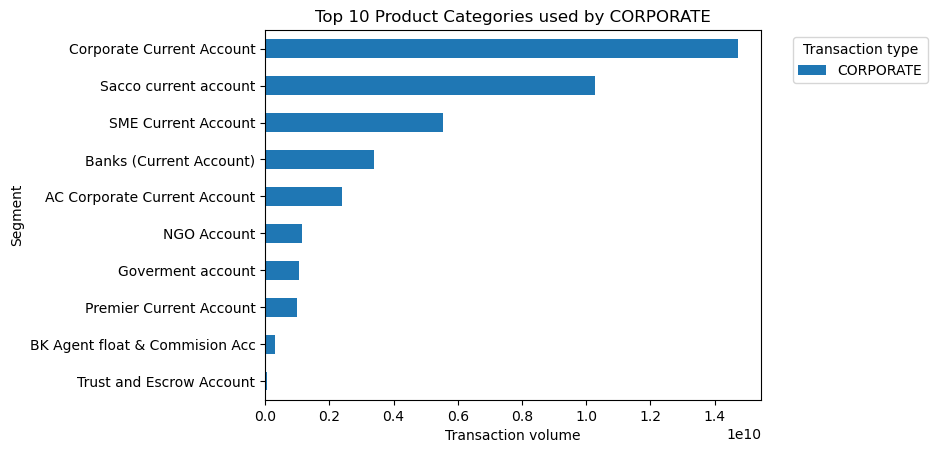

In [135]:
desired_segment = 'CORPORATE'
N = 10
df_segment = top_branches[top_branches['SEGMENT'] == desired_segment]

# Sort data by transaction volume
df_segment = df_segment.groupby(['CATEGORY', 'SEGMENT'])['AMOUNT_LOCAL_2'].sum().unstack()
df_segment = df_segment.sort_values(by='CORPORATE', ascending=False)


# Get the top N transactions
top_N = df_segment['CORPORATE'].nlargest(N)

# Filter the original dataframe to include only the top N transactions
df_top_N = df_segment.loc[top_N.index]

# Plot the transaction volume for the desired segment
plt.figure(figsize=(9, 12))
ax = df_top_N.iloc[::-1].plot(kind='barh', stacked=True)
plt.ylabel('Segment')
plt.xlabel('Transaction volume')
plt.title(f'Top {N} Product Categories used by {desired_segment}')
plt.legend(title='Transaction type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


<Figure size 900x1200 with 0 Axes>

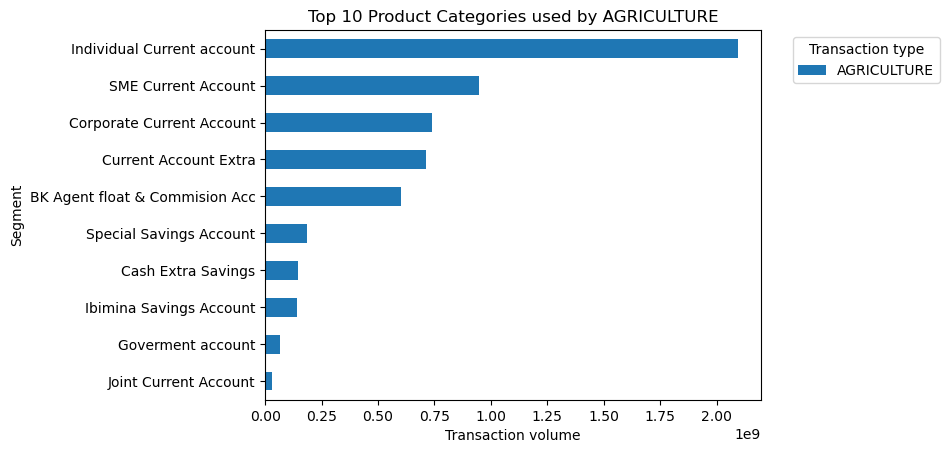

In [136]:
desired_segment = 'AGRICULTURE'
N = 10
df_segment = top_branches[top_branches['SEGMENT'] == desired_segment]

# Sort data by transaction volume
df_segment = df_segment.groupby(['CATEGORY', 'SEGMENT'])['AMOUNT_LOCAL_2'].sum().unstack()
df_segment = df_segment.sort_values(by='AGRICULTURE', ascending=False)


# Get the top N transactions
top_N = df_segment['AGRICULTURE'].nlargest(N)

# Filter the original dataframe to include only the top N transactions
df_top_N = df_segment.loc[top_N.index]

# Plot the transaction volume for the desired segment
plt.figure(figsize=(9, 12))
ax = df_top_N.iloc[::-1].plot(kind='barh', stacked=True)
plt.ylabel('Segment')
plt.xlabel('Transaction volume')
plt.title(f'Top {N} Product Categories used by {desired_segment}')
plt.legend(title='Transaction type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


<Figure size 900x1200 with 0 Axes>

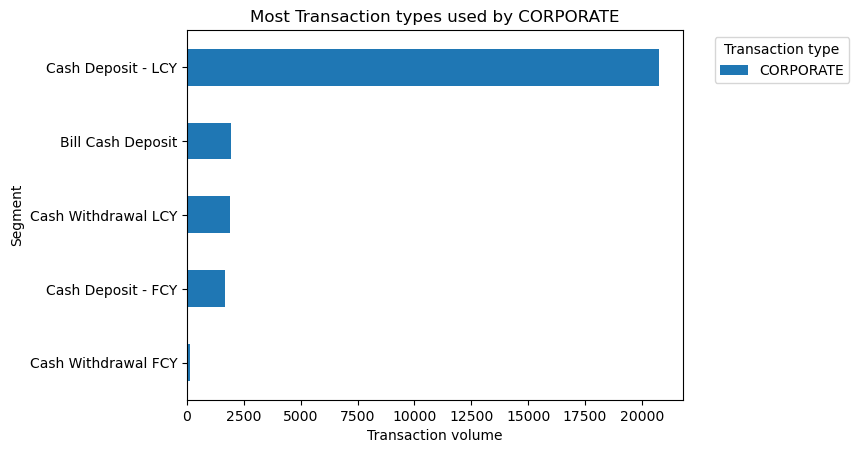

In [137]:
desired_segment = 'CORPORATE'
N = 20
df_segment = top_branches[top_branches['SEGMENT'] == desired_segment]

# Sort data by transaction volume
df_segment = df_segment.groupby(['SHORT_DESC', 'SEGMENT'])['RECID'].count().unstack()
df_segment = df_segment.sort_values(by='CORPORATE', ascending=False)


# Get the top N transactions
top_N = df_segment['CORPORATE'].nlargest(N)

# Filter the original dataframe to include only the top N transactions
df_top_N = df_segment.loc[top_N.index]

# Plot the transaction volume for the desired segment
plt.figure(figsize=(9, 12))
ax = df_top_N.iloc[::-1].plot(kind='barh', stacked=True)
plt.ylabel('Segment')
plt.xlabel('Transaction volume')
plt.title(f'Most Transaction types used by {desired_segment}')
plt.legend(title='Transaction type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



<Figure size 900x1200 with 0 Axes>

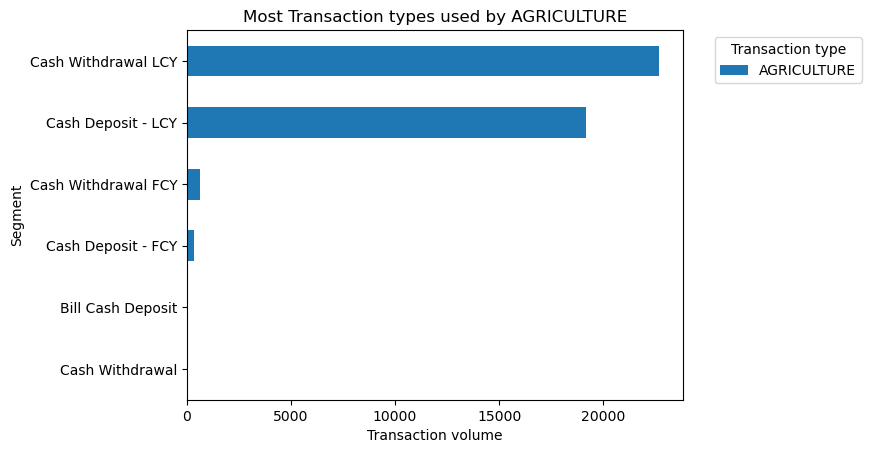

In [80]:
desired_segment = 'AGRICULTURE'
N = 10
df_segment = all_teller[all_teller['SEGMENT'] == desired_segment]

# Sort data by transaction volume
df_segment = df_segment.groupby(['SHORT_DESC', 'SEGMENT'])['RECID'].count().unstack()
df_segment = df_segment.sort_values(by='AGRICULTURE', ascending=False)


# Get the top N transactions
top_N = df_segment['AGRICULTURE'].nlargest(N)

# Filter the original dataframe to include only the top N transactions
df_top_N = df_segment.loc[top_N.index]

# Plot the transaction volume for the desired segment
plt.figure(figsize=(9, 12))
ax = df_top_N.iloc[::-1].plot(kind='barh', stacked=True)
plt.ylabel('Segment')
plt.xlabel('Transaction volume')
plt.title(f'Most Transaction types used by {desired_segment}')
plt.legend(title='Transaction type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


<Figure size 900x1200 with 0 Axes>

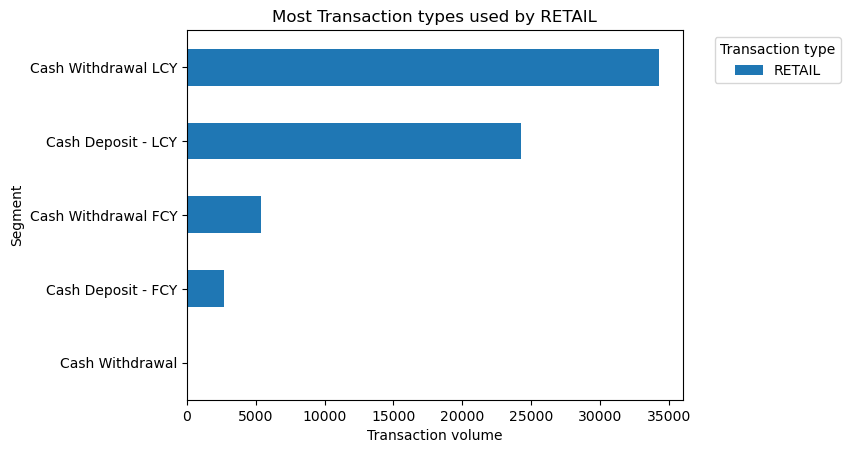

In [138]:
desired_segment = 'RETAIL'
N = 10
df_segment = top_branches[top_branches['SEGMENT'] == desired_segment]

# Sort data by transaction volume
df_segment = df_segment.groupby(['SHORT_DESC', 'SEGMENT'])['RECID'].count().unstack()
df_segment = df_segment.sort_values(by='RETAIL', ascending=False)


# Get the top N transactions
top_N = df_segment['RETAIL'].nlargest(N)

# Filter the original dataframe to include only the top N transactions
df_top_N = df_segment.loc[top_N.index]

# Plot the transaction volume for the desired segment
plt.figure(figsize=(9, 12))
ax = df_top_N.iloc[::-1].plot(kind='barh', stacked=True)
plt.ylabel('Segment')
plt.xlabel('Transaction volume')
plt.title(f'Most Transaction types used by {desired_segment}')
plt.legend(title='Transaction type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


<Figure size 900x1200 with 0 Axes>

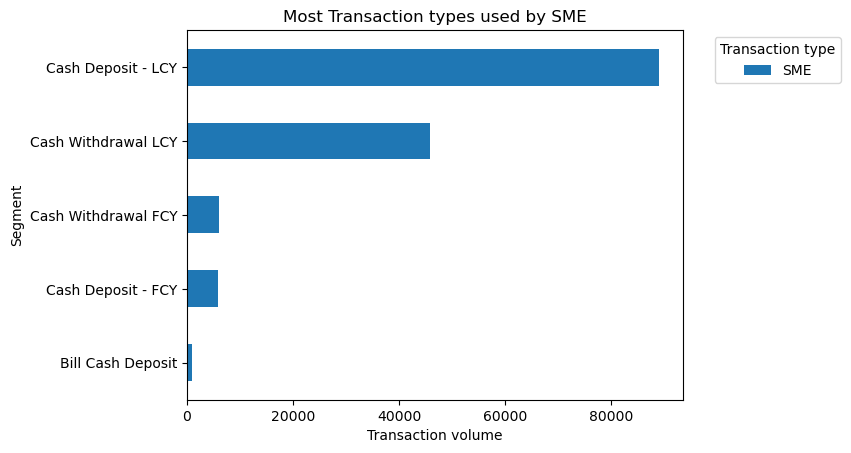

In [139]:
desired_segment = 'SME'
N = 10
df_segment = top_branches[top_branches['SEGMENT'] == desired_segment]

# Sort data by transaction volume
df_segment = df_segment.groupby(['SHORT_DESC', 'SEGMENT'])['RECID'].count().unstack()
df_segment = df_segment.sort_values(by='SME', ascending=False)


# Get the top N transactions
top_N = df_segment['SME'].nlargest(N)

# Filter the original dataframe to include only the top N transactions
df_top_N = df_segment.loc[top_N.index]

# Plot the transaction volume for the desired segment
plt.figure(figsize=(9, 12))
ax = df_top_N.iloc[::-1].plot(kind='barh', stacked=True)
plt.ylabel('Segment')
plt.xlabel('Transaction volume')
plt.title(f'Most Transaction types used by {desired_segment}')
plt.legend(title='Transaction type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [34]:
all_teller

,RECID,TRANSACTION_CODE,TELLER_ID_1,DR_CR_MARKER,CURRENCY_1,ACCOUNT_1,AMOUNT_LOCAL_1,VALUE_DATE_1,CURR_MARKET_1,POS_TYPE_1,CURRENCY_2,TELLER_ID_2,ACCOUNT_2,CATEGORY,CUSTOMER_2,AMOUNT_LOCAL_2,RATE_1,DEAL_RATE,AMOUNT_FCY_2,CHRG_AMT_FCCY,CHEQUE_NUMBER,CHEQ_TYPE,NET_AMOUNT,VALUE_DATE_2,EXPOSURE_DATE_2,EXPOSURE_DATE_2.1,POS_TYPE_2,NARRATIVE_2,WAIVE_CHARGES,TT_RECIEVER,AUTH_DATE,INPUTTER,DATE_TIME,AUTHORISER,CO_CODE,DEPT_CODE,SHORT_DESC,TARGET,GENDER,DESCRIPTION,COMPANY_NAME,SEGMENT
0,TT223369QC7F,163,1601,DEBIT,RWF,RWF1000116011017,25000,20221202,10,TR,RWF,1601,100016762592,Goverment account,1243798.0,25000,NaN,NaN,NaN,NaN,NaN,NaN,25000.0,20221202,20221202.0,20221202.0,TR,20222361940/BERTIN UWINEZA/SC-F,YES,NaN,20221202,31859_RW002270_I_INAU_OFS_IRISINTERNAL,2212020954,31859_RW002270_OFS_IRISINTERNAL,RW0010017,403376,Bill Cash Deposit,54.0,,Medium SME,NYAGATARE BRANCH,SME
1,TT22336L6JPR,10,4603,DEBIT,RWF,RWF1000146031047,300000,20221202,10,TR,RWF,4603,100034937715,NGO Account,1440862.0,300000,NaN,NaN,NaN,NaN,NaN,NaN,300000.0,20221202,20221202.0,20221202.0,TR,1.00035E+11,YES,NaN,20221202,10895929_RW001273_I_INAU_OFS_BROWSERTC,2212021026,10895929_RW001273_OFS_BROWSERTC,RW0010047,403073,Cash Deposit - LCY,49.0,,Local NGO,INSURANCE PLAZA BRANCH,SME
2,TT22336BKHG4,165,1102,DEBIT,RWF,RWF1000111021012,451000,20221202,10,TR,RWF,1102,RWF1703200051002,NaN,NaN,451000,NaN,NaN,NaN,NaN,NaN,NaN,451000.0,20221202,NaN,NaN,TR,446999X1541/0788566046/MAJUNE SIBO,YES,NaN,20221202,4560_RW001123_I_INAU_OFS_IRISINTERNAL,2212021127,4560_RW001123_OFS_IRISINTERNAL,RW0010012,403044,RB RWF,NaN,NaN,NaN,RUBAVU BRANCH,
3,TT22336S9V8B,165,1102,DEBIT,RWF,RWF1000111021012,201000,20221202,10,TR,RWF,1102,RWF1703200051002,NaN,NaN,201000,NaN,NaN,NaN,NaN,NaN,NaN,201000.0,20221202,NaN,NaN,TR,446999X1541/0788566046/MAJUNE SIBO,YES,NaN,20221202,67379_RW001123_I_INAU_OFS_IRISINTERNAL,2212021151,67379_RW001123_OFS_IRISINTERNAL,RW0010012,403044,RB RWF,NaN,NaN,NaN,RUBAVU BRANCH,
4,TT223365HJ2V,10,6504,DEBIT,RWF,RWF1000165041066,19500,20221202,10,TR,RWF,6504,100002181333,Individual Current account,1029308.0,19500,NaN,NaN,NaN,NaN,NaN,NaN,19500.0,20221202,20221202.0,20221202.0,TR,NOTIFICATION/EMBRACE R E F C LTD,YES,NaN,20221202,10896616_RW001868_I_INAU_OFS_BROWSERTC,2212021239,10896616_RW001868_OFS_BROWSERTC,RW0010066,403229,Cash Deposit - LCY,73.0,MALE,SALARY EARNERS PRIVATE,RUYENZI BRANCH,SME
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824345,TT23093QVDNK,10,609,DEBIT,RWF,RWF1000106091007,75000,20230403,10,TR,RWF,609,100034056085,Individual Current account,1432629.0,75000,NaN,NaN,NaN,NaN,NaN,NaN,75000.0,20230403,20230403.0,20230403.0,TR,MANISHIMWE YVES/PLAQUE,YES,NaN,20230403,13017409_RW001958_I_INAU_OFS_BROWSERTC,2304011315,13017409_RW001958_OFS_BROWSERTC,RW0010007,403255,Cash Deposit - LCY,72.0,MALE,PROFESSIONALS,NYABUGOGO BRANCH,SME
824346,TT23093W6WXK,10,2400,DEBIT,RWF,RWF1000124001025,508000,20230403,10,TR,RWF,2400,100087608241,BK Agent float & Commision Acc,1705460.0,508000,NaN,NaN,NaN,NaN,NaN,NaN,508000.0,20230403,20230403.0,20230403.0,TR,VESTINE UWAMARIYA/SELF,YES,NaN,20230403,12989532_RW001980_I_INAU_OFS_BROWSERTC,2304011329,12989532_RW001980_OFS_BROWSERTC,RW0010025,403263,Cash Deposit - LCY,65.0,FEMALE,primary agricultural producers,KABARONDO BRANCH,AGRICULTURE
824347,TT230933D4XL,10,609,DEBIT,RWF,RWF1000106091007,30000,20230403,10,TR,RWF,609,100074439068,SME Current Account,1276552.0,30000,NaN,NaN,NaN,NaN,NaN,NaN,30000.0,20230403,20230403.0,20230403.0,TR,MUKAMA JEAN CHRISOSTOME/MOTO,YES,NaN,20230403,12995261_RW001958_I_INAU_OFS_BROWSERTC,2304011422,12995261_RW001958_OFS_BROWSERTC,RW0010007,403255,Cash Deposit - LCY,53.0,,Large SME,NYABUGOGO BRANCH,SME
824348,TT230937GKRV,10,805,DEBIT,RWF,RWF1000108051009,180000,20230403,10,TR,RWF,805,100012520845,SME Current Account,1188997.0,180000,NaN,NaN,NaN,NaN,NaN,NaN,180000.0,20230403,20230403.0,202304

<Figure size 900x1200 with 0 Axes>

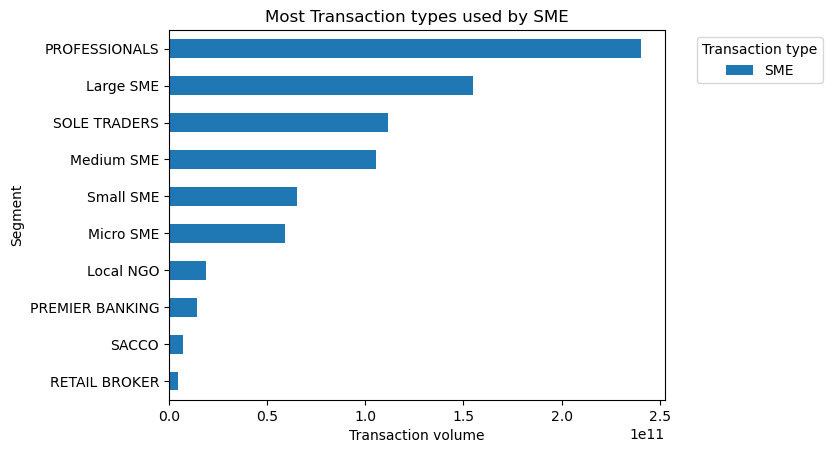

In [33]:
desired_segment = 'RETAIL'
N = 10
df_segment = all_teller[all_teller['SEGMENT'] == desired_segment]

# Sort data by transaction volume
df_segment = df_segment.groupby(['DESCRIPTION', 'SEGMENT'])['AMOUNT_LOCAL_2'].sum().unstack()
df_segment = df_segment.sort_values(by='RETAIL', ascending=False)


# Get the top N transactions
top_N = df_segment['RETAIL'].nlargest(N)

# Filter the original dataframe to include only the top N transactions
df_top_N = df_segment.loc[top_N.index]

# Plot the transaction volume for the desired segment
plt.figure(figsize=(9, 12))
ax = df_top_N.iloc[::-1].plot(kind='barh', stacked=True)
plt.ylabel('Segment')
plt.xlabel('Transaction volume')
plt.title(f'Most Transaction types used by {desired_segment}')
plt.legend(title='Transaction type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


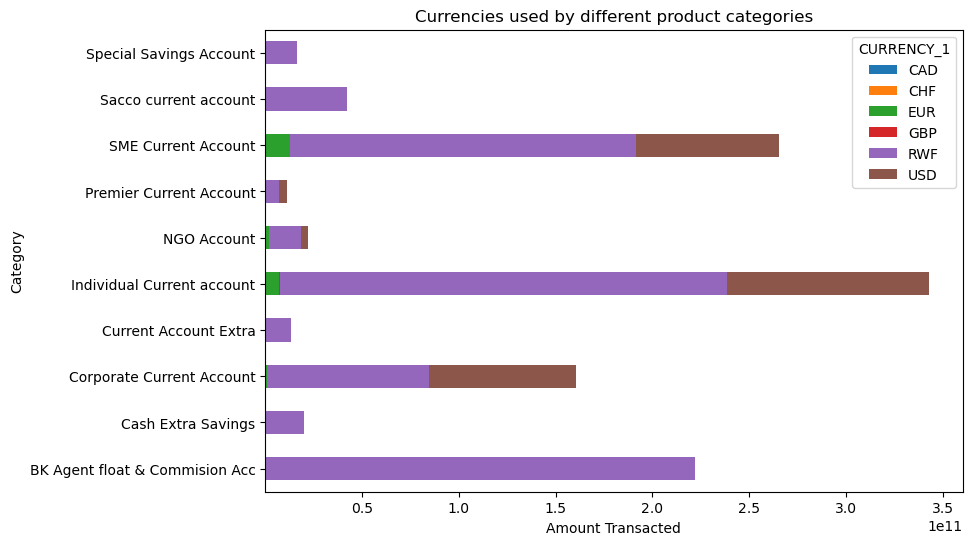

In [29]:
import matplotlib.pyplot as plt

# Sort categories by total transaction volume and select top N
N = 10 # Number of top categories to display
category_totals = all_teller.groupby('CATEGORY')['AMOUNT_LOCAL_2'].sum()
top_categories = category_totals.sort_values(ascending=False).index[:N]

# Subset data to only include top categories
all_teller_top = all_teller[all_teller['CATEGORY'].isin(top_categories)]

# Plot using subsetted data
fig, ax = plt.subplots(figsize=(9, 6))
all_teller_top.groupby(['CATEGORY', 'CURRENCY_1'])['AMOUNT_LOCAL_2'].sum().unstack().plot(kind='barh', stacked=True, ax=ax)

# Set labels and title
plt.ylabel('Category')
plt.xlabel('Amount Transacted')
plt.title(f'Currencies used by different product categories')

plt.show()


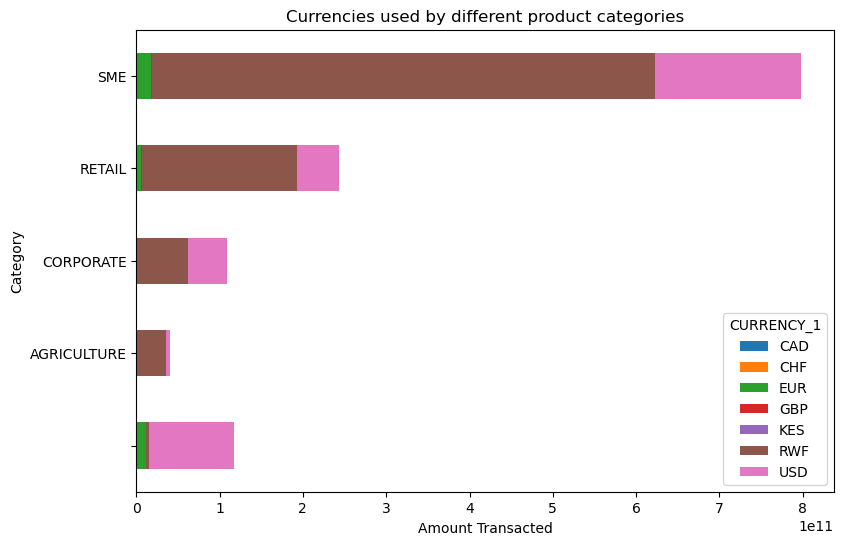

In [35]:
import matplotlib.pyplot as plt

# Sort categories by total transaction volume and select top N
N = 10 # Number of top categories to display
category_totals = all_teller.groupby('SEGMENT')['AMOUNT_LOCAL_2'].sum()
top_categories = category_totals.sort_values(ascending=False).index[:N]

# Subset data to only include top categories
all_teller_top = all_teller[all_teller['SEGMENT'].isin(top_categories)]

# Plot using subsetted data
fig, ax = plt.subplots(figsize=(9, 6))
all_teller_top.groupby(['SEGMENT', 'CURRENCY_1'])['AMOUNT_LOCAL_2'].sum().unstack().plot(kind='barh', stacked=True, ax=ax)

# Set labels and title
plt.ylabel('Segment')
plt.xlabel('Amount Transacted')
plt.title(f'')

plt.show()

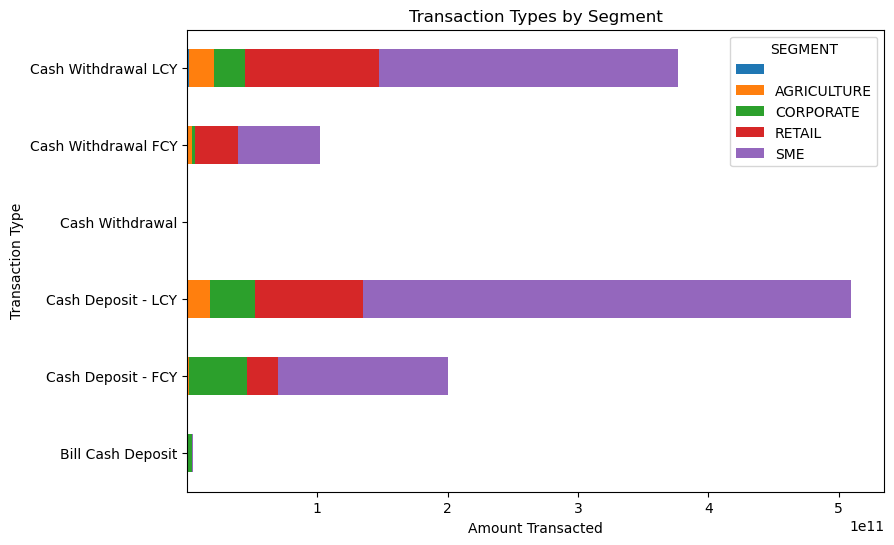

In [30]:

# Sort categories by total transaction volume and select top N
N = 20 # Number of top categories to display
category_totals = all_teller.groupby('DESCRIPTION')['AMOUNT_LOCAL_2'].sum()
top_categories = category_totals.sort_values(ascending=False).index[:]

# Subset data to only include top categories
all_teller_top = all_teller[all_teller['DESCRIPTION'].isin(top_categories)]

# Plot using subsetted data
fig, ax = plt.subplots(figsize=(9, 6))
all_teller_top.groupby(['SHORT_DESC', 'SEGMENT'])['AMOUNT_LOCAL_2'].sum().unstack().plot(kind='barh', stacked=True, ax=ax)

# Set labels and title
plt.ylabel('Transaction Type')
plt.xlabel('Amount Transacted')
plt.title(f'Transaction Types by Segment')

plt.show()




<Figure size 500x1200 with 0 Axes>

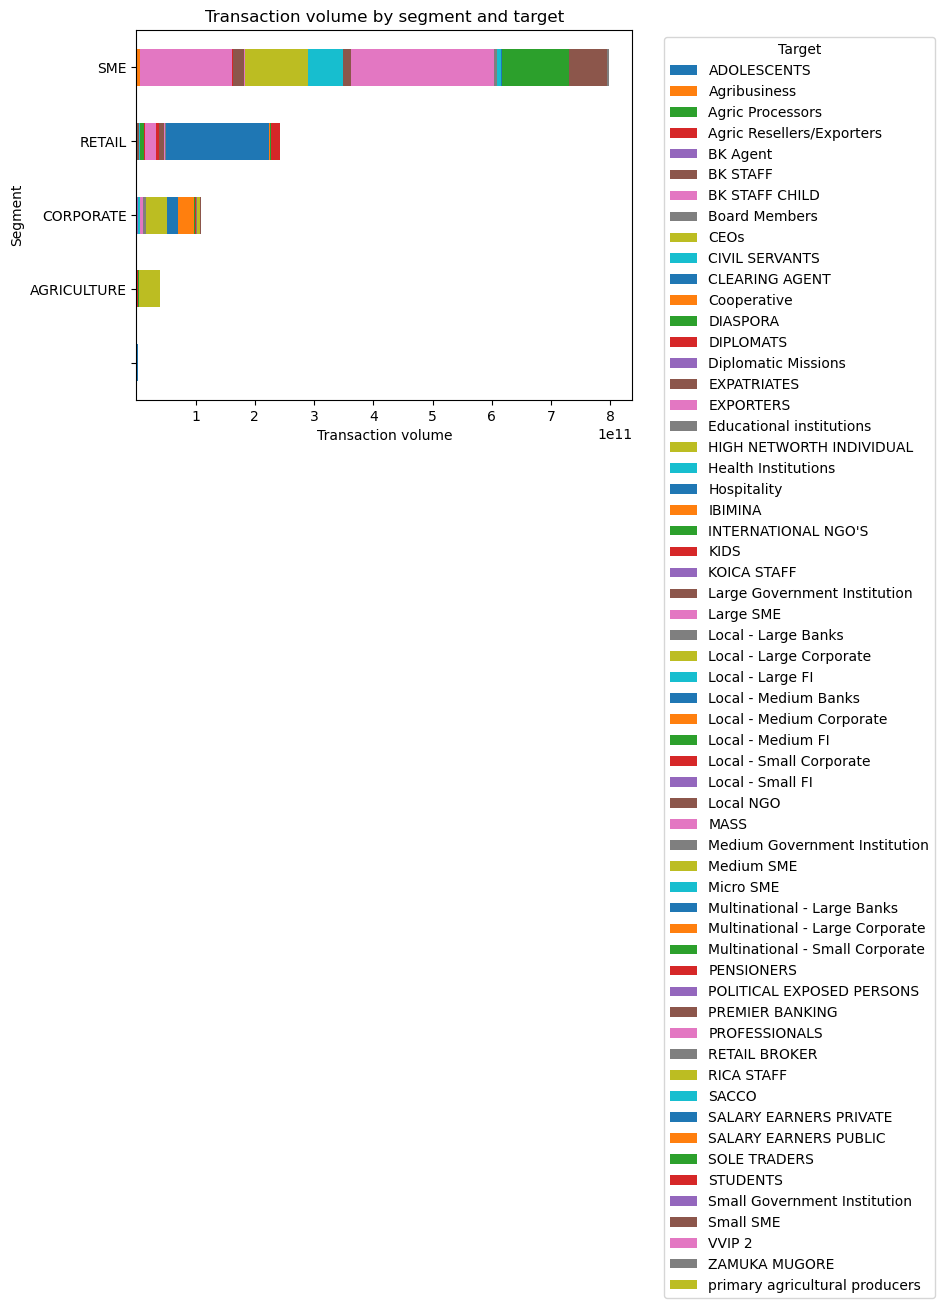

In [32]:

plt.figure(figsize=(5, 12))
ax = all_teller.groupby(['SEGMENT', 'DESCRIPTION'])['AMOUNT_LOCAL_2'].sum().unstack().plot(kind='barh', stacked=True)
plt.ylabel('Segment')
plt.xlabel('Transaction volume')
plt.title('Transaction volume by segment and target')
plt.legend(title='Target', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [143]:

# Filter the DataFrame to create a new DataFrame containing only the records for your chosen branches
chosen_branches_df = all_teller[(all_teller['COMPANY_NAME'] == 'BK Head Office') | (all_teller['COMPANY_NAME'] == 'KIGALI BRANCH')]

# Display the new DataFrame to see the distinction between your chosen branches
chosen_branches_df

,RECID,TRANSACTION_CODE,TELLER_ID_1,DR_CR_MARKER,CURRENCY_1,ACCOUNT_1,AMOUNT_LOCAL_1,VALUE_DATE_1,CURR_MARKET_1,POS_TYPE_1,CURRENCY_2,TELLER_ID_2,ACCOUNT_2,CATEGORY,CUSTOMER_2,AMOUNT_LOCAL_2,RATE_1,DEAL_RATE,AMOUNT_FCY_2,CHRG_AMT_FCCY,CHEQUE_NUMBER,CHEQ_TYPE,NET_AMOUNT,VALUE_DATE_2,EXPOSURE_DATE_2,EXPOSURE_DATE_2.1,POS_TYPE_2,NARRATIVE_2,WAIVE_CHARGES,TT_RECIEVER,AUTH_DATE,INPUTTER,DATE_TIME,AUTHORISER,CO_CODE,DEPT_CODE,SHORT_DESC,TARGET,GENDER,DESCRIPTION,COMPANY_NAME,SEGMENT
17,TT223367DFQC,10,118,DEBIT,RWF,RWF1000101181002,4000000,20221202,10,TR,RWF,118,100034364847,Joint Current Account,1435408.0,4000000,NaN,NaN,NaN,NaN,NaN,NaN,4000000.0,20221202,20221202.0,20221202.0,TR,MUKUNZI FABRICE/VRS,YES,NaN,20221202,10894678_RW001636_I_INAU_OFS_BROWSERTC,2212021319,10894678_RW001636_OFS_BROWSERTC,RW0010002,403172,Cash Deposit - LCY,72.0,MALE,PROFESSIONALS,KIGALI BRANCH,SME
58,TT22336LTSPK,5,119,CREDIT,RWF,RWF1000101191002,840000,20221202,10,TR,RWF,119,100000174887,Premier Current Account,1000909.0,840000,NaN,NaN,NaN,NaN,26662405.0,CURR,840000.0,20221202,NaN,NaN,TR,BIMARO NOEL/SIGNATAIRE,NO,BIMARO NOEL/SIGNATAIRE,20221202,10894873_RW001714_I_INAU_OFS_BROWSERTC,2212021326,10894873_RW001714_OFS_BROWSERTC,RW0010002,403522,Cash Withdrawal LCY,6.0,,Small SME,KIGALI BRANCH,SME
69,TT22336Q7HJ8,10,118,DEBIT,RWF,RWF1000101181002,10000,20221202,10,TR,RWF,118,100002968279,Banks (Current Account),1032139.0,10000,NaN,NaN,NaN,NaN,NaN,NaN,10000.0,20221202,20221202.0,20221202.0,TR,PHILOS MC LTD/TENDER 017/G/NCB,YES,NaN,20221202,10896231_RW001636_I_INAU_OFS_BROWSERTC,2212021328,10896231_RW001636_OFS_BROWSERTC,RW0010002,403172,Cash Deposit - LCY,40.0,,Local - Medium Banks,KIGALI BRANCH,CORPORATE
80,TT22336HV2LK,5,124,CREDIT,RWF,RWF1000101241002,23500,20221202,10,TR,RWF,124,100008424815,Individual Current account,1111686.0,23500,NaN,NaN,NaN,NaN,56626674.0,CURR,24000.0,20221202,NaN,NaN,TR,TWIZEYIMANA JEAN DAMASCENE,NO,TWIZEYIMANA JEAN DAMASCENE,20221202,10897656_RW001996_I_INAU_OFS_BROWSERTC,2212021329,10897656_RW001996_OFS_BROWSERTC,RW0010002,403547,Cash Withdrawal LCY,73.0,MALE,SALARY EARNERS PRIVATE,KIGALI BRANCH,RETAIL
92,TT22336PWJQ0,10,118,DEBIT,RWF,RWF1000101181002,410000,20221202,10,TR,RWF,118,100082978385,SME Current Account,1776385.0,410000,NaN,NaN,NaN,NaN,NaN,NaN,410000.0,20221202,20221202.0,20221202.0,TR,NYIRAGUKURA ESTHER/LOYER,YES,NaN,20221202,10897330_RW001636_I_INAU_OFS_BROWSERTC,2212021331,10897330_RW001636_OFS_BROWSERTC,RW0010002,403172,Cash Deposit - LCY,6.0,,Small SME,KIGALI BRANCH,SME
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824275,TT23090FFF5L,4,124,CREDIT,USD,USD1000101241002,551907,20230331,10,TR,USD,124,100009736675,Premier Current Account,1149767.0,551907,1103.8143,NaN,500.0,4.0,24020827.0,CUPO,504.0,20230331,NaN,NaN,TR,NIYOMUGABO SALIM/SIGN,NO,NIYOMUGABO SALIM/SIGN,20230331,12938495_RW001996_I_INAU_OFS_BROWSERTC,2303311114,12938495_RW001996_OFS_BROWSERTC,RW0010002,403547,Cash Withdrawal FCY,55.0,,Micro SME,KIGALI BRANCH,SME
824283,TT230903BF6K,5,117,CREDIT,RWF,RWF1000101171002,4600000,20230331,10,TR,RWF,117,100076633023,Individual Current account,1738891.0,4600000,NaN,NaN,NaN,NaN,113.0,CURR,4600000.0,20230331,NaN,NaN,TR,DESTIN MAISHA/SELF,NO,DESTIN MAISHA/SELF,20230331,12936246_RW001708_OFS_BROWSERTC,2303311114,12938641_RW001482,RW0010002,403124,Cash Withdrawal LCY,73.0,MALE,SALARY EARNERS PRIVATE,KIGALI BRANCH,RETAIL
824297,TT230902K5SG,10,117,DEBIT,RWF,RWF1000101171002,5600000,20230331,10,TR,RWF,117,100000103629,Individual Current account,1001972.0,5600000,NaN,NaN,NaN,NaN,NaN,NaN,5600000.0,20230331,20230331.0,20230331.0,TR,SELF DEPOSIT,YES,NaN,20230331,12938836_RW001482_I_INAU_OFS_BROWSERTC,2303311525,12938836_RW001482_OFS_BROWSERTC,RW0010002,403124,Cash Deposit - LCY,73.0,MALE,SALARY EARNERS PRIVATE,KIGALI BRANCH,RETAIL
824315,TT230908WWS6,10,123,DEBIT,RWF,RWF1000101231002,250000,20230331,10,TR

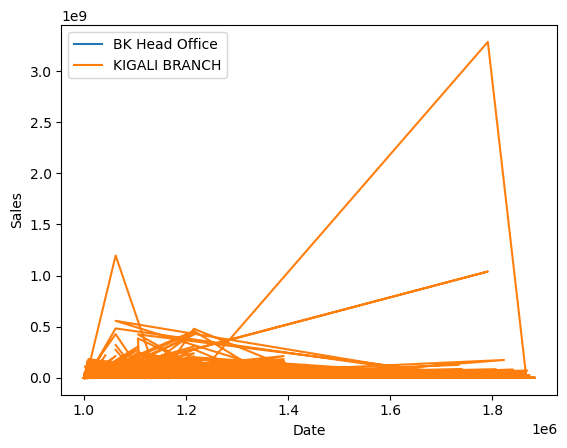

In [149]:
branch1 = 'BK Head Office'
branch2 = 'KIGALI BRANCH'
branch1_df = all_teller[all_teller['COMPANY_NAME'] == branch1]
branch2_df = all_teller[all_teller['COMPANY_NAME'] == branch2]

# Plot a line chart of the sales for each branch on the same graph
plt.plot(branch1_df['CUSTOMER_2'], branch1_df['AMOUNT_LOCAL_2'], label= branch1)
plt.plot(branch2_df['CUSTOMER_2'], branch2_df['AMOUNT_LOCAL_2'], label=branch2)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(loc='upper left')
plt.show()